In [2]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook', font_scale=2)

# os.chdir("/gscratch/rao/aresf/Code/STSPNet/")
os.chdir("C:/Users/aresf/Desktop/Code/STSPNET/")
from analysis_utils import *

%load_ext autoreload
%autoreload 2

## STPNet

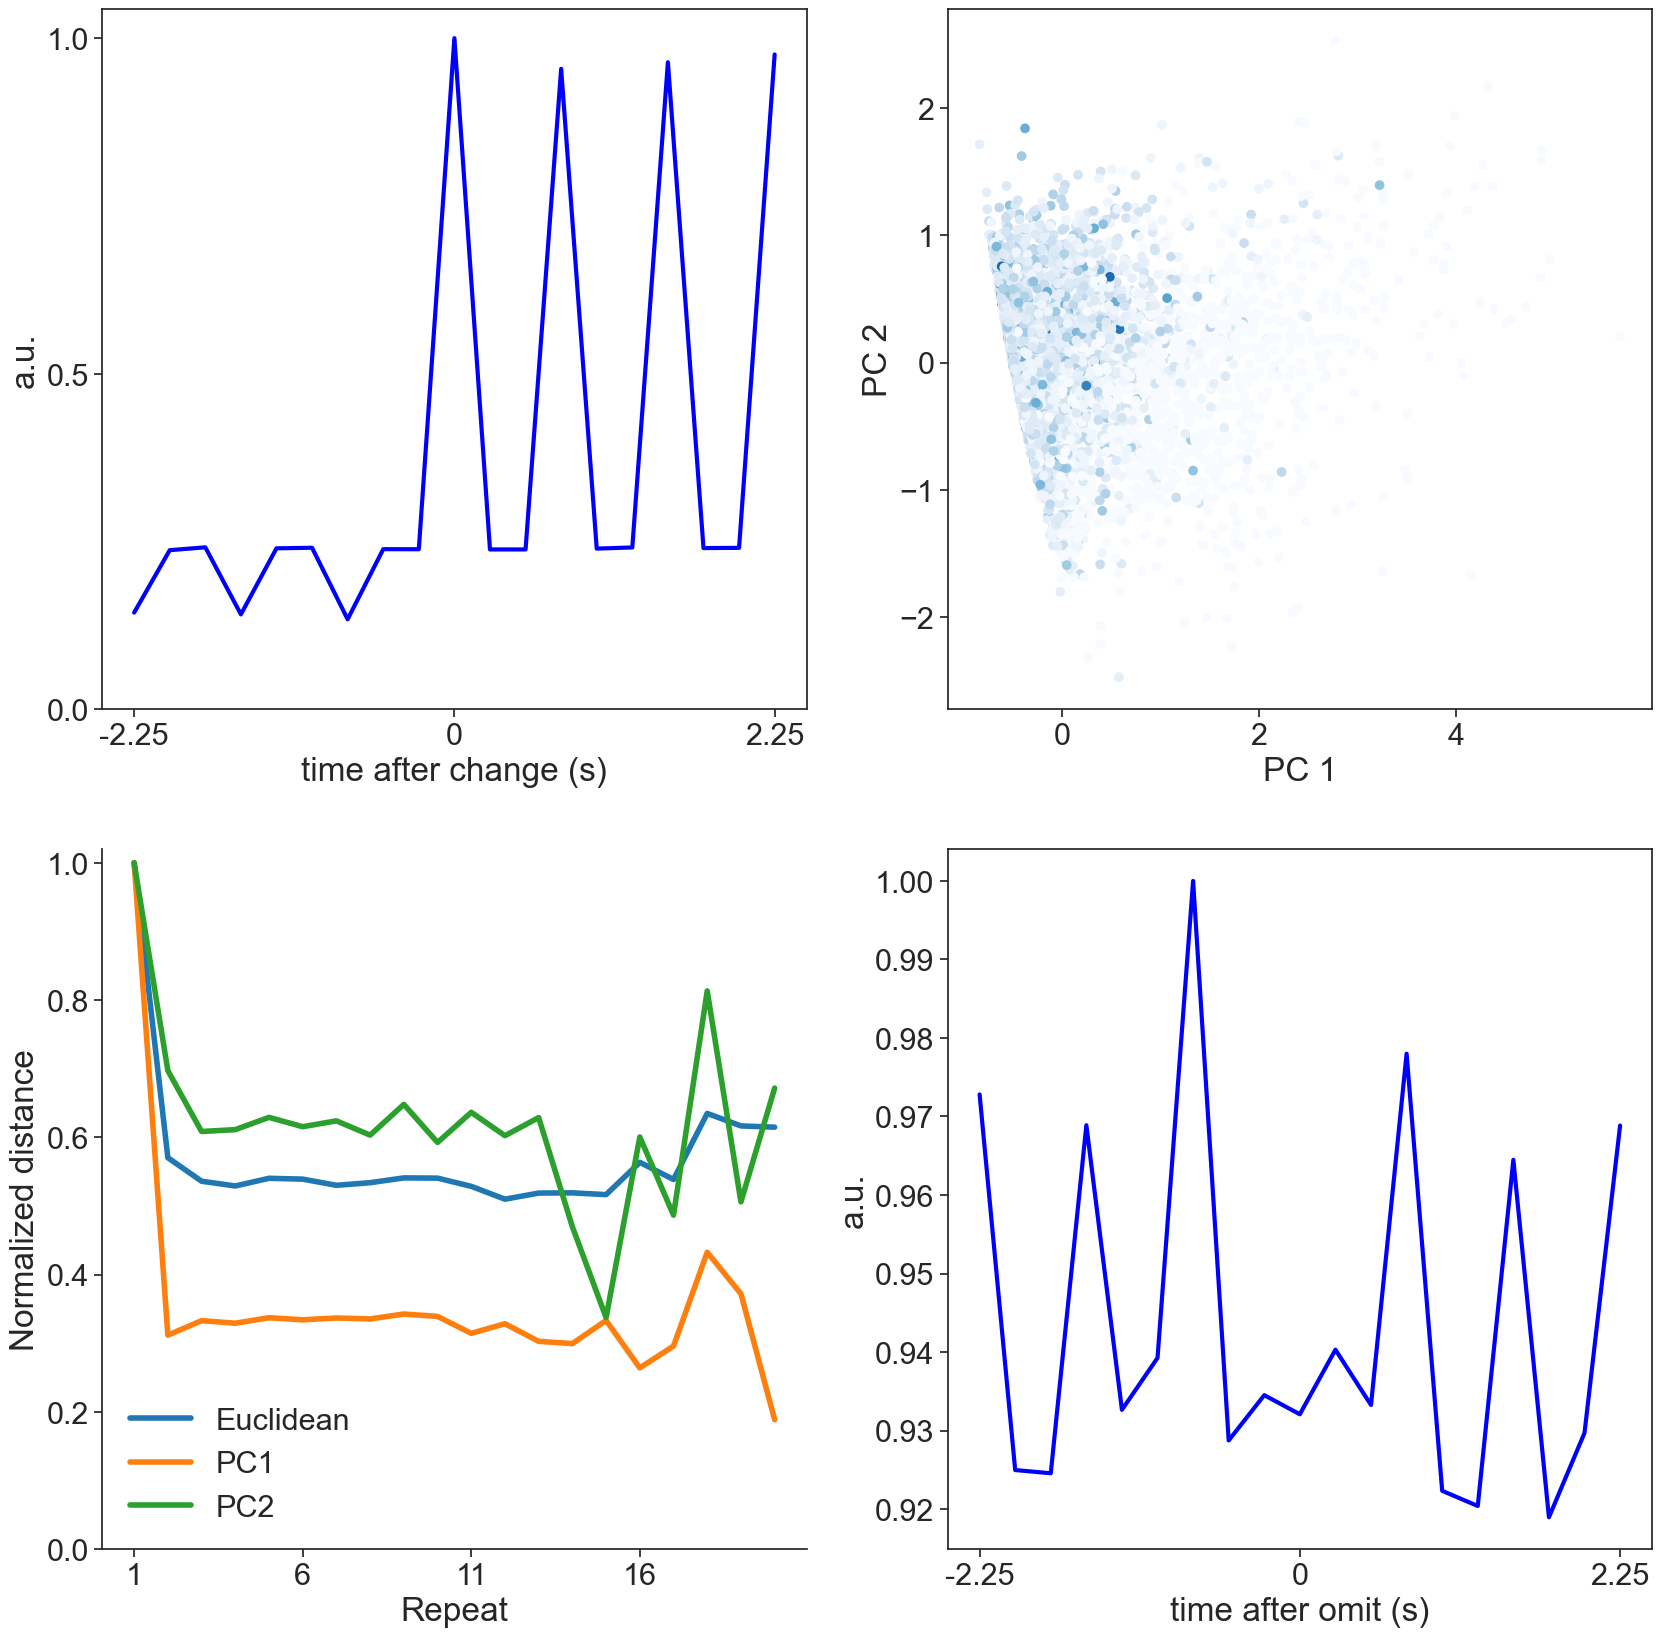

In [110]:
# result_path = "RESULT\STPNet\STPNet_A_1_0.0.pkl"
result_path = "RESULT\STPNet\STPNet_A_1.pkl"
# result_path = "brian_models\RESULT\STSPNet\STSPNet_A_1.pkl"
# result_path = "RESULT\STPNet\STPNet_B_1.pkl"
model_data = pickle.load(open(result_path, 'rb'))
plot_model_tings(result_path)

Text(0.5, 1.0, 'current code')

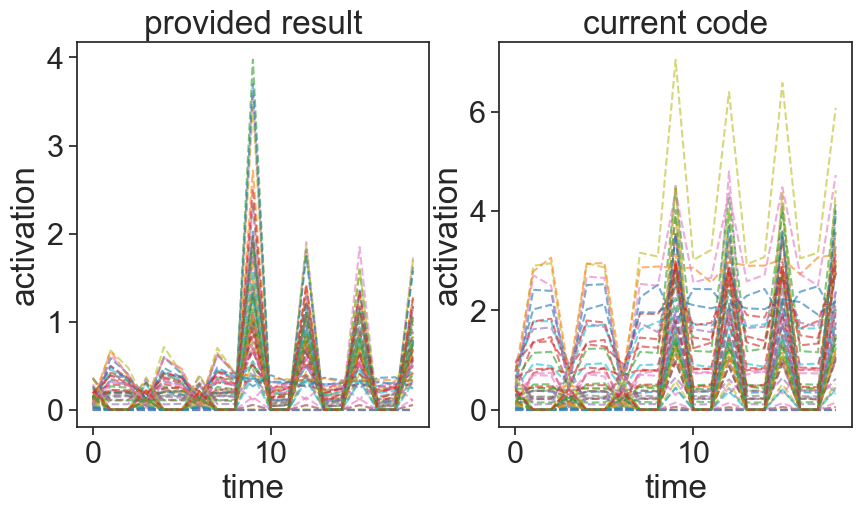

In [81]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

# result_path = "brian_models\RESULT\STSPNet\STSPNet_A_1.pkl"
model_data, pref_image = get_acts(result_path)
go_trial = get_go_trials(model_data, pref_image)

axs[0].plot(go_trial.T, linestyle="--", alpha=0.6);
axs[0].set_xlabel("time")
axs[0].set_ylabel("activation")
axs[0].set_title("provided result")


result_path = "RESULT/STPNet/STPNet_A_1.pkl"
model_data, pref_image = get_acts(result_path)
go_trial = get_go_trials(model_data, pref_image)

axs[1].plot(go_trial.T, linestyle="--", alpha=0.6);
axs[1].set_xlabel("time")
axs[1].set_ylabel("activation")
axs[1].set_title("current code")

#todo: look into why neurons have so much activity between images


Text(0, 0.5, 'a.u.')

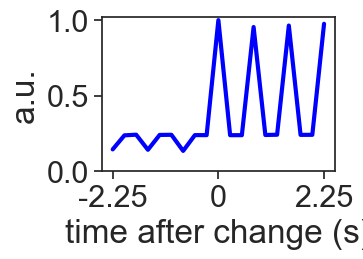

In [111]:
model_data = pickle.load(open(result_path, 'rb'))
input_act = model_data['input']
hidden_act = model_data['hidden']
labels = model_data['labels']
image = model_data['image']

# find preferred image
img_idx = [np.argwhere(image==i) for i in range(8)]
input_act_image = [input_act[i[:,0], i[:,1]].mean(axis=0) for i in img_idx]
pref_image = np.argmax(np.stack(input_act_image), axis=0)

# # find go trials
# idx = np.argwhere(labels.squeeze()==1)

# go_trial = []
# for trial in idx:
#     trial_chunk = hidden_act[trial[0], (trial[1]-9):(trial[1]+9+1)]
#     if trial_chunk.shape[0] == 19:
#         go_trial.append(trial_chunk)
        
# go_trial = np.stack(go_trial).mean(axis=0).transpose()

go_trial = np.zeros((input_act.shape[2], 19))
for cell in range(go_trial.shape[0]):
    idx = np.argwhere((labels.squeeze()==1)&(image==pref_image[cell]))
    go_trials = []
    for trial in idx:
        trial_chunk = input_act[trial[0], (trial[1]-9):(trial[1]+9+1), cell]
        if trial_chunk.shape[0] == go_trial.shape[1]:
            go_trials.append(trial_chunk)
    go_trial[cell,:] = np.stack(go_trials).mean(axis=0)

idx = np.argsort(go_trial[:,9])[::-1]

fig, ax = plt.subplots(figsize=(3,2))

# plt.plot(go_trial.mean(axis=0), color=colors[1], linewidth=3)
plt.plot(go_trial.mean(axis=0) / go_trial.mean(axis=0).max(), 
color='blue', linewidth=3)
plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('a.u.')


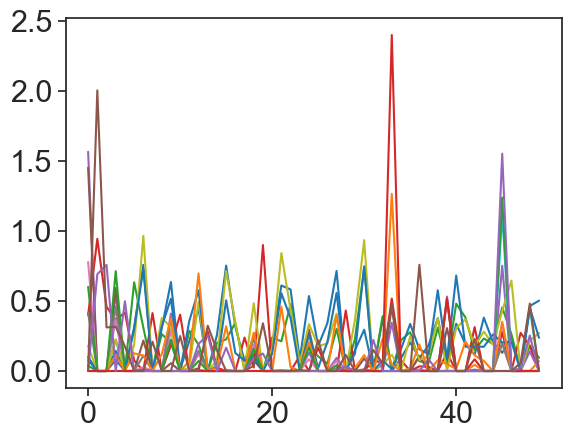

In [112]:
# plt.imshow(model_data['hidden'].mean(axis=0)[0:50,:].T, aspect="auto")
# plt.imshow(model_data['hidden'][0, 0:50,:].T, aspect="auto")
# plt.colorbar()
plt.plot(model_data['hidden'][0,0:50, :]);

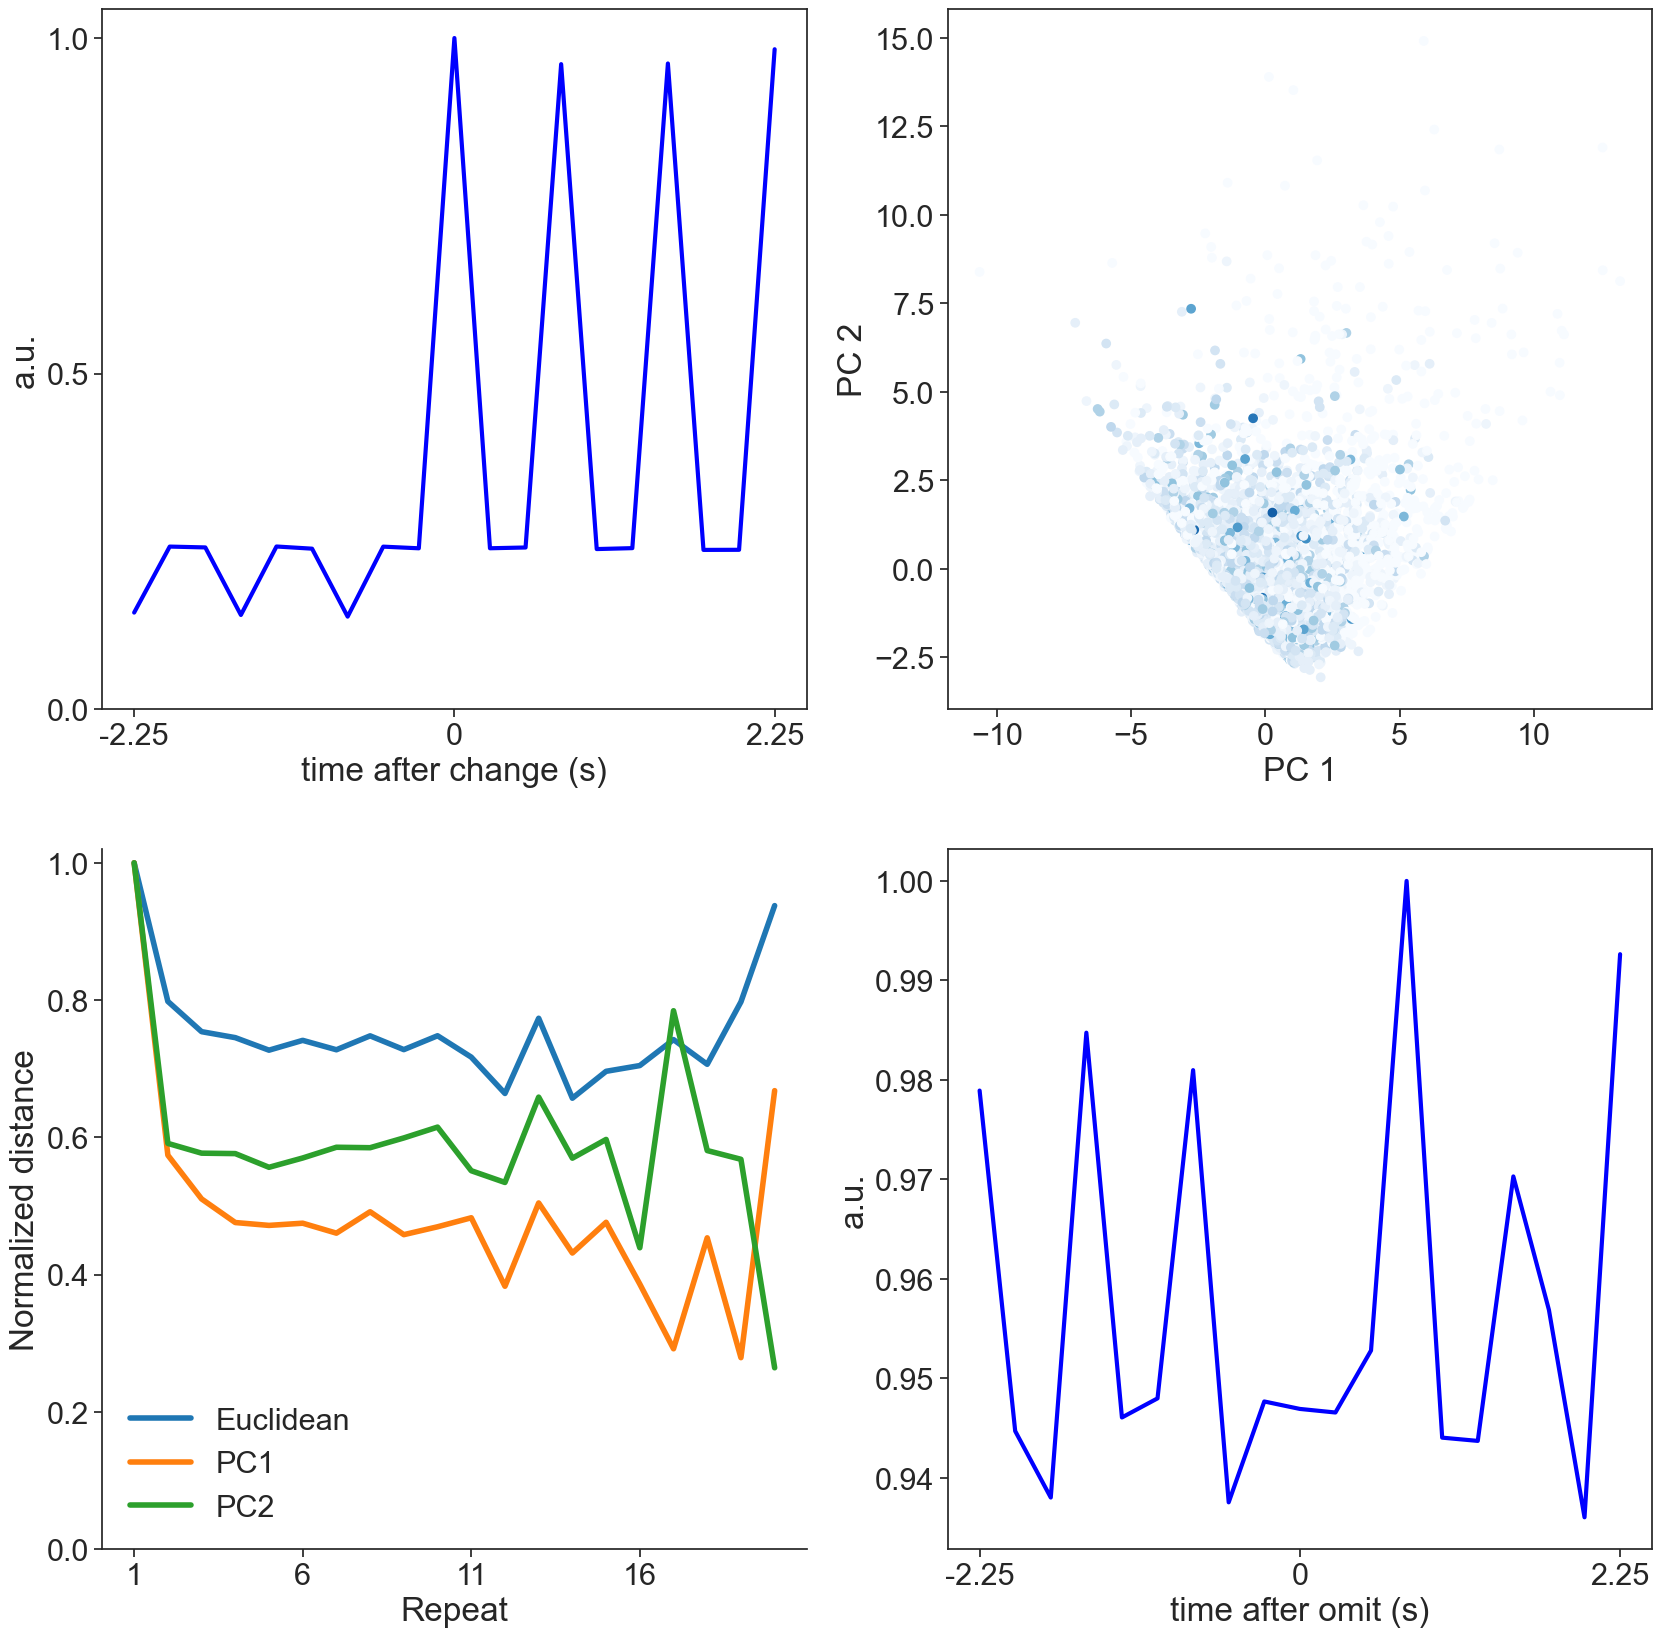

In [6]:

plot_model_tings(result_path)

In [7]:
cellind = 0

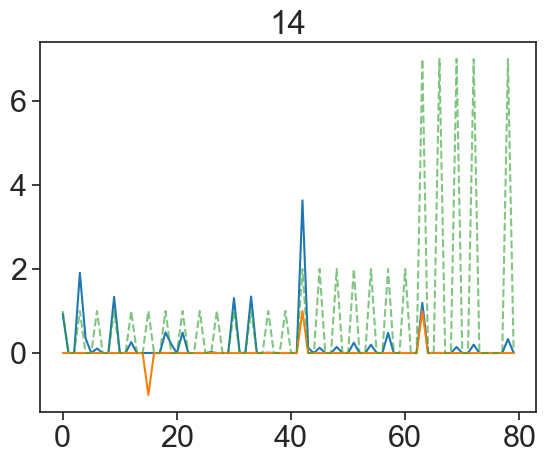

In [99]:
# acts = np.reshape(model_data['hidden'], (128*199, 16))
img_data = model_data['image'][:,:-1]
img_post = np.roll(img_data, -1, axis=1)
ims = img_data.flatten()
trange = np.arange(0, 80)
batchind = 1
plt.plot(model_data['hidden'][batchind,trange,cellind])
# plt.plot(acts[trange,1])
# plt.plot(8 - img_post[0, trange])
# plt.plot(model_data['pred'][0,trange, 0])
plt.plot(model_data['labels'][batchind, trange, 0])
plt.plot(8 - img_data[batchind, trange], alpha=0.6, linestyle="--")
plt.title(str(cellind))
cellind = np.mod(cellind + 1, 16)

## STPNet with $r$ replaced by prediction error

$$\frac{dx(t)}{dt} = \frac{1 - x(t)}{\tau_{x}} - Ux(t)f(\epsilon(t))$$

where $\epsilon$ is the prediction error (input - previous input; i.e. previous input is the prediction) 

$$err = \frac{1}{\tau_{x}} + \frac{1}{2}Uf(\epsilon)$$

and f is a non-linear transformation of it

$f = relu$

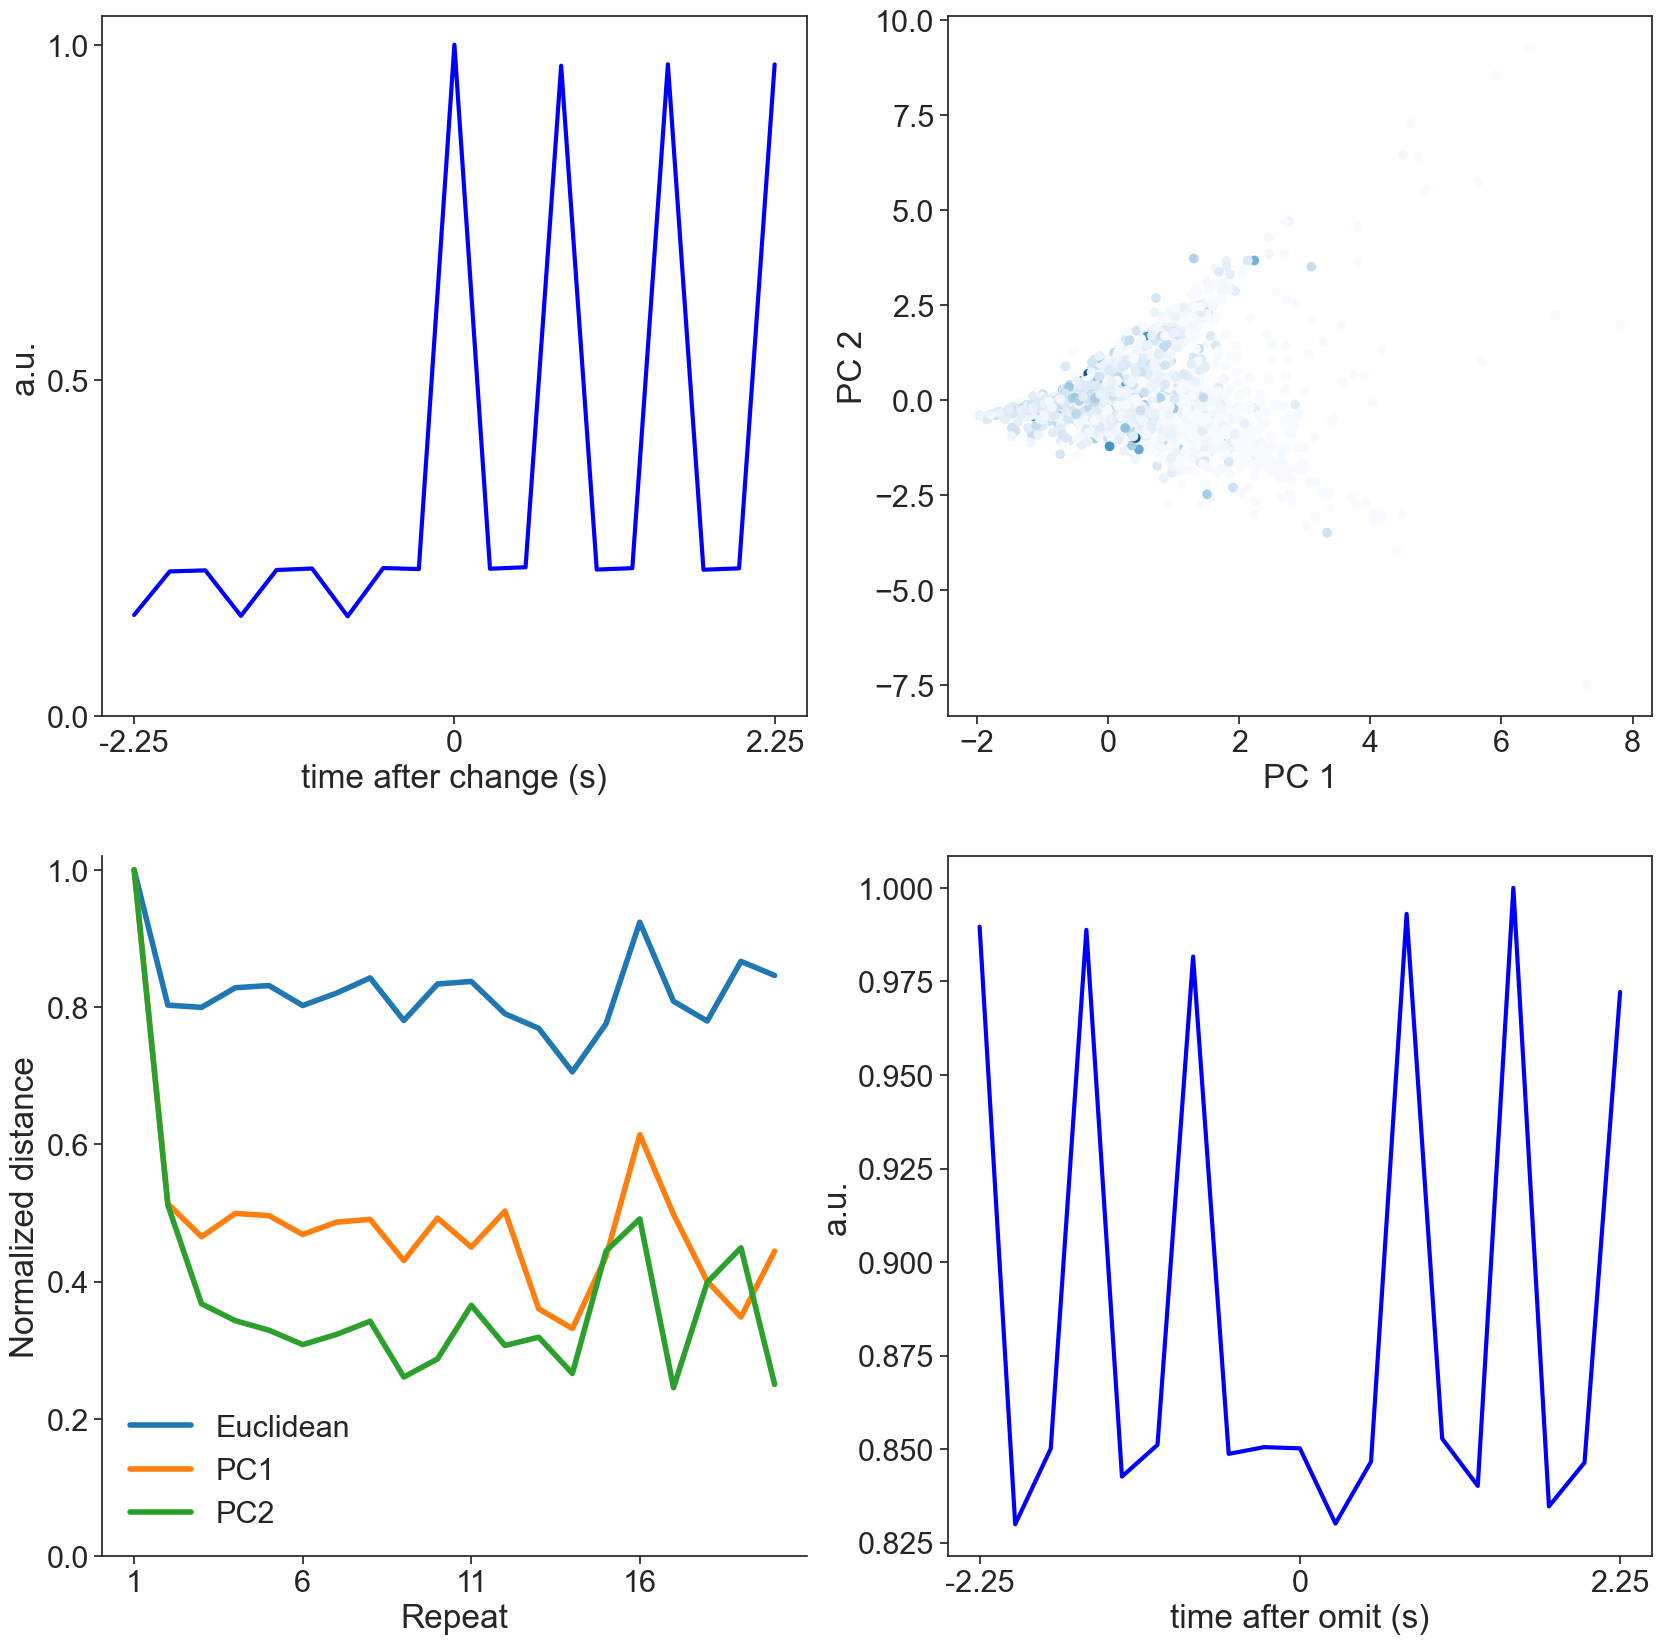

In [5]:
result_path = "RESULT/STPENet/STPENet_A_2.pkl"
plot_model_tings(result_path)

## Noise on prediction

$f = relu$

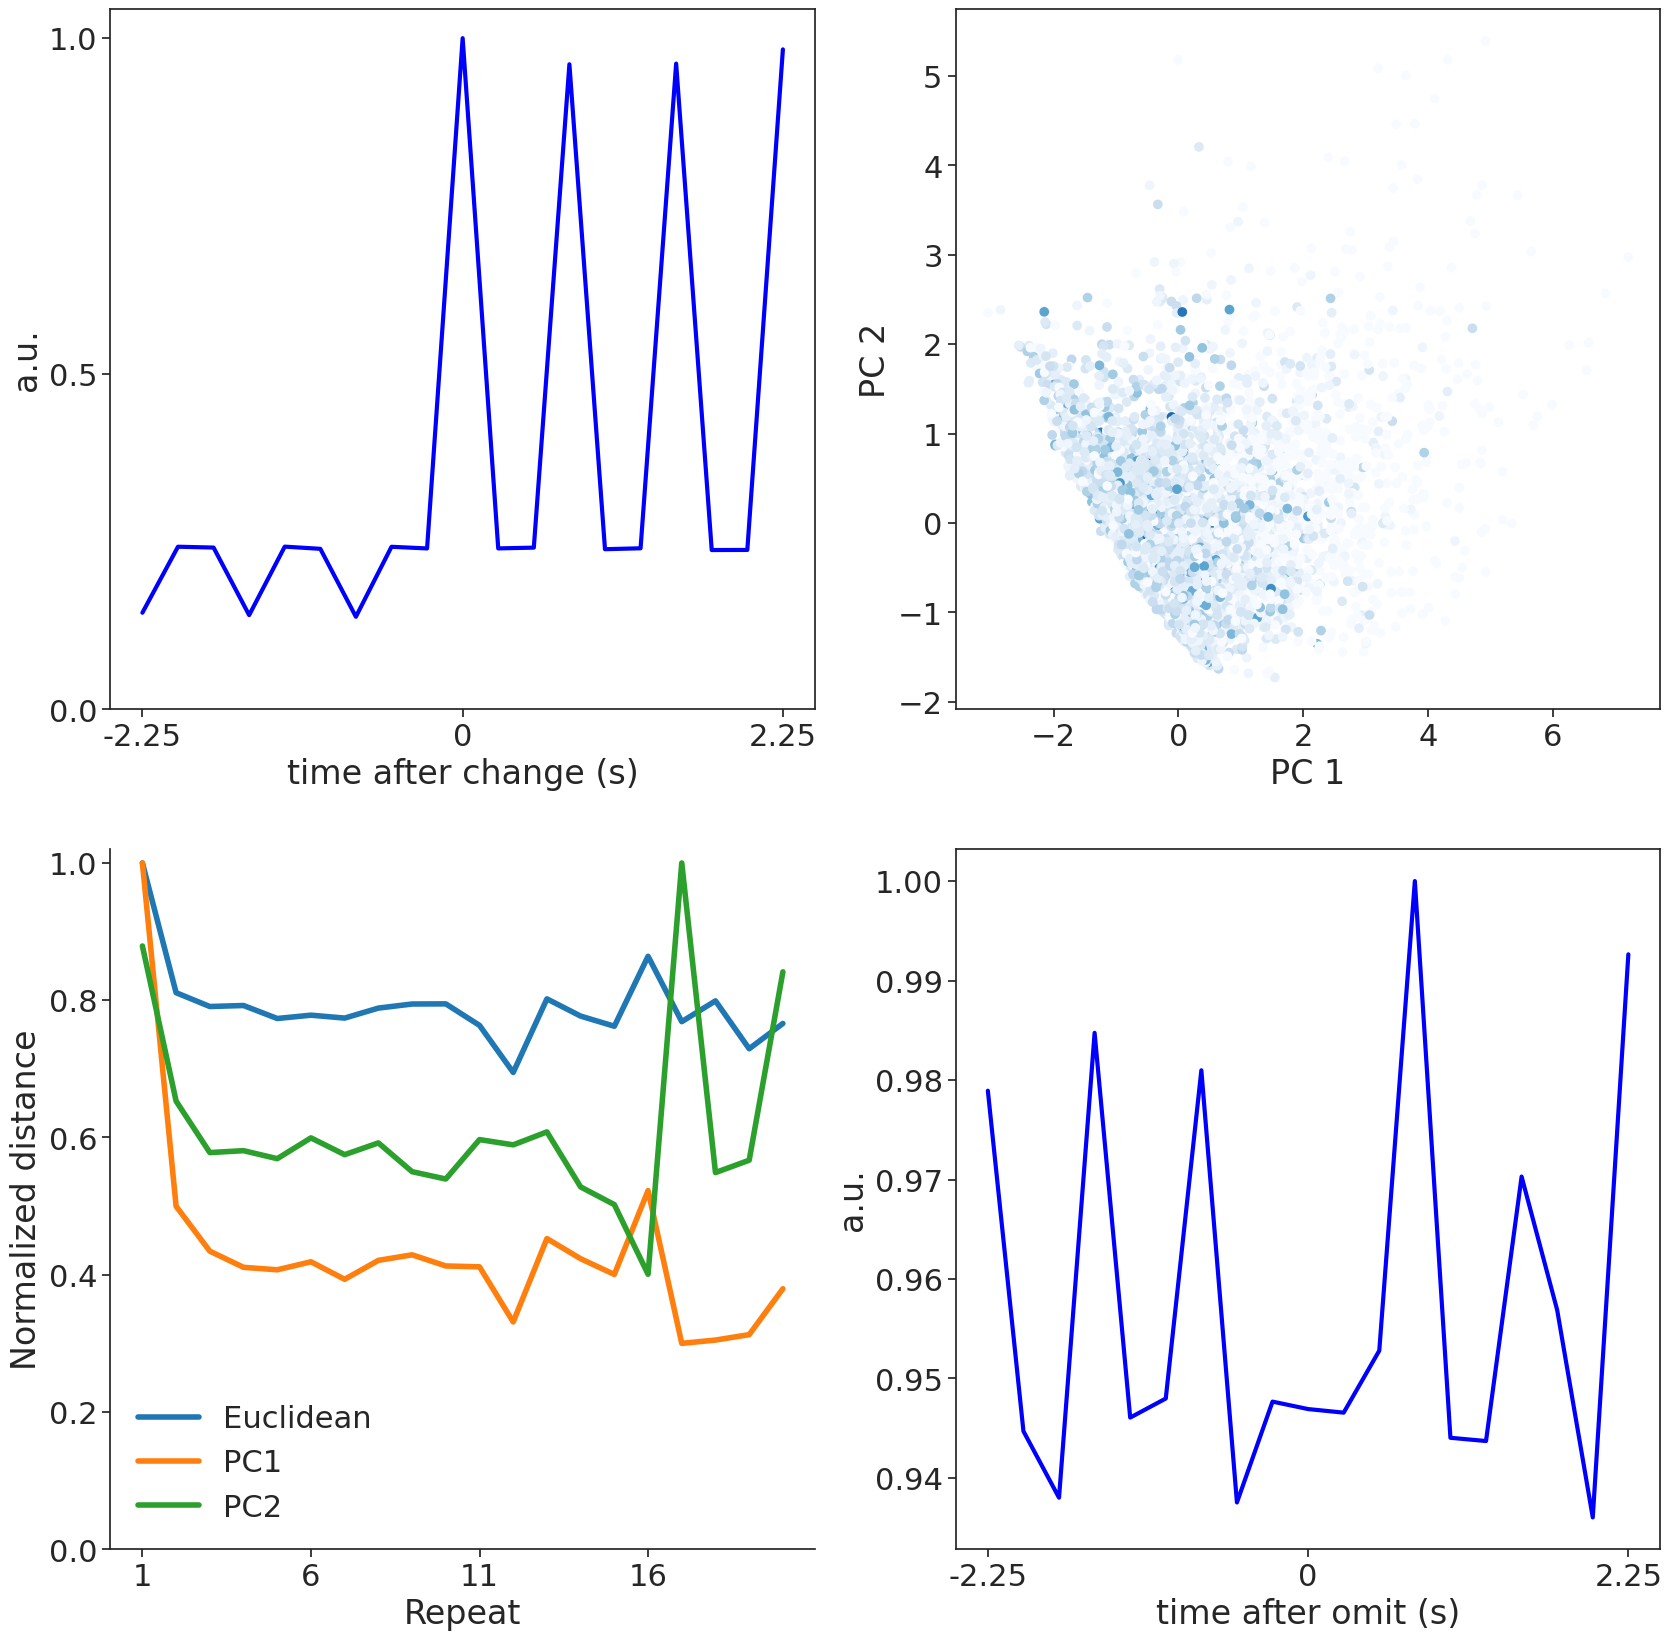

In [14]:
result_path = "RESULT/STPENet/STPENet_A_1.pkl"
plot_model_tings(result_path)

## Noisy prediction, gelu

$$err = \frac{1}{\tau_{x}} + \frac{1}{2}U(x)gelu(\epsilon)$$

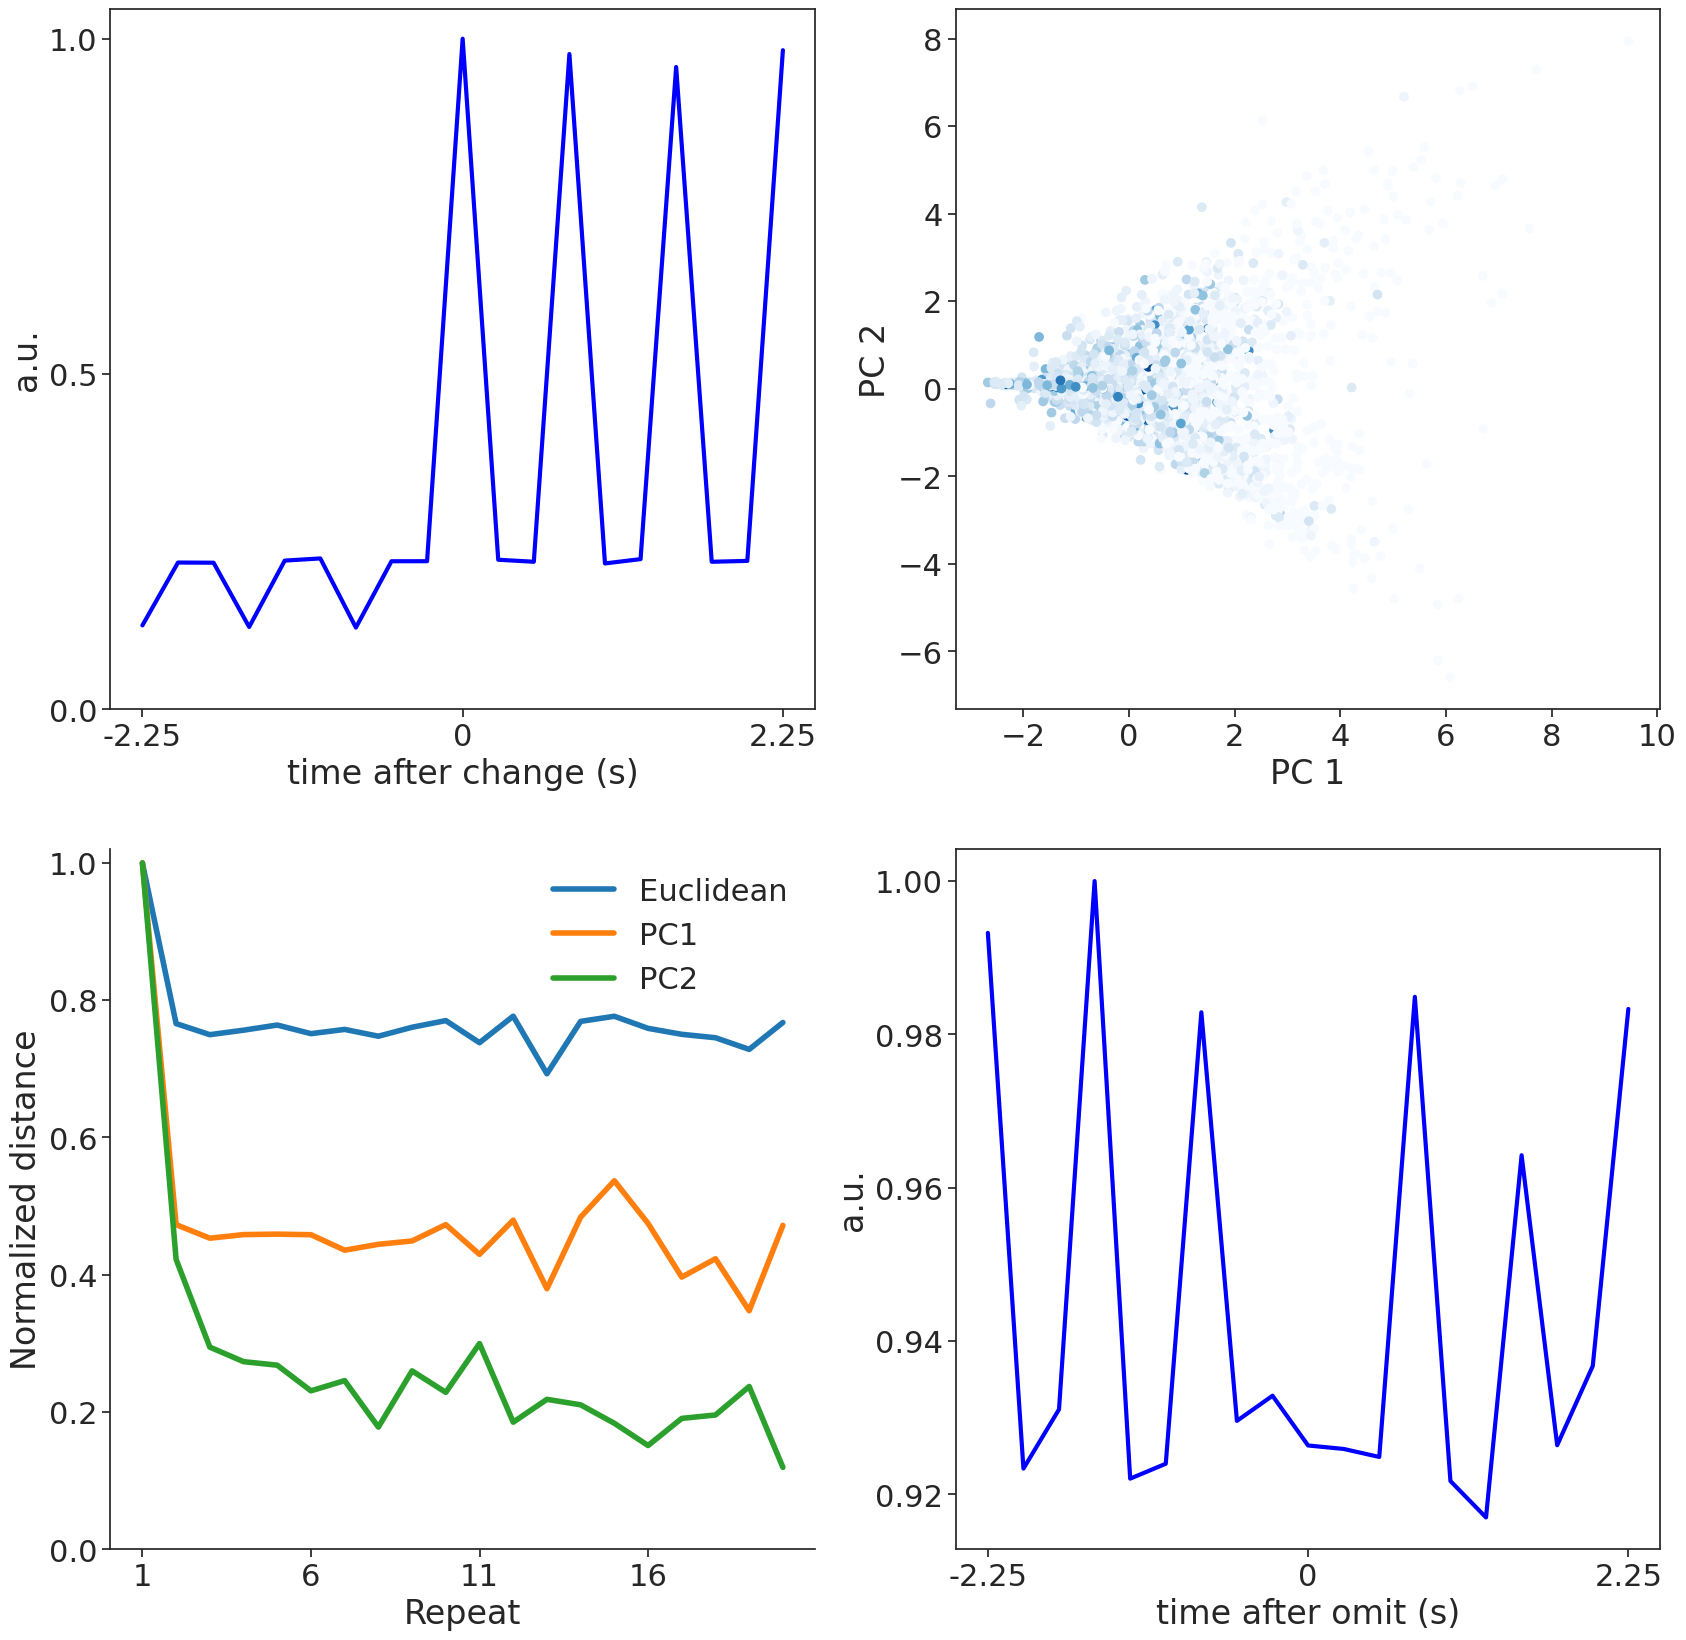

In [15]:
result_path = "RESULT/STPENet/STPENet_A_3.pkl"
plot_model_tings(result_path)

## Vanilla RNN

Show training curve

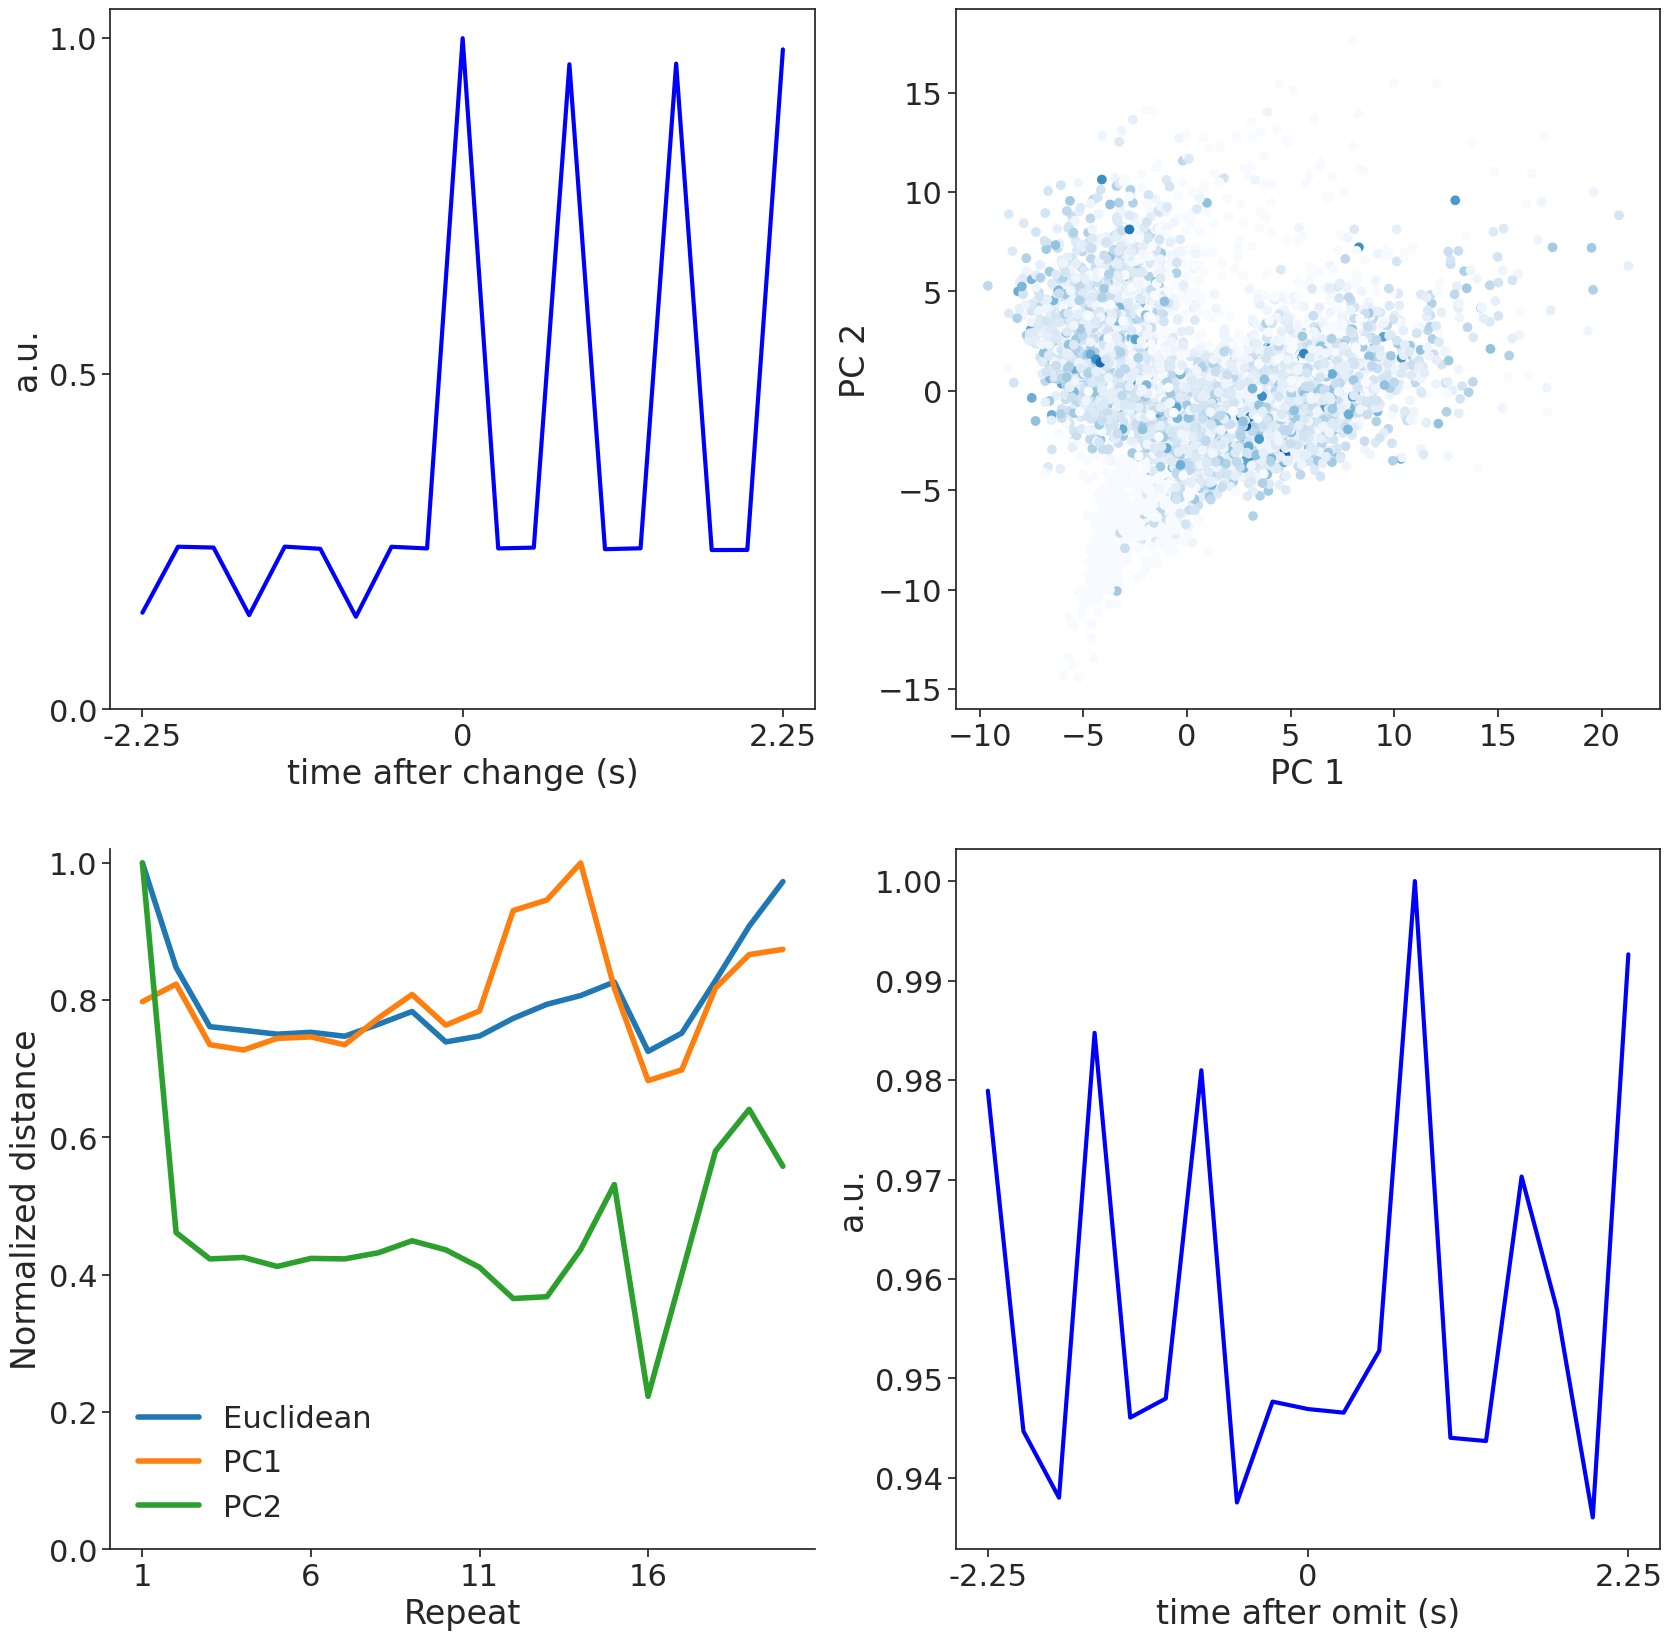

In [17]:
result_path = "RESULT/RNN/RNN_A_1.pkl"
plot_model_tings(result_path)

## STPRNN

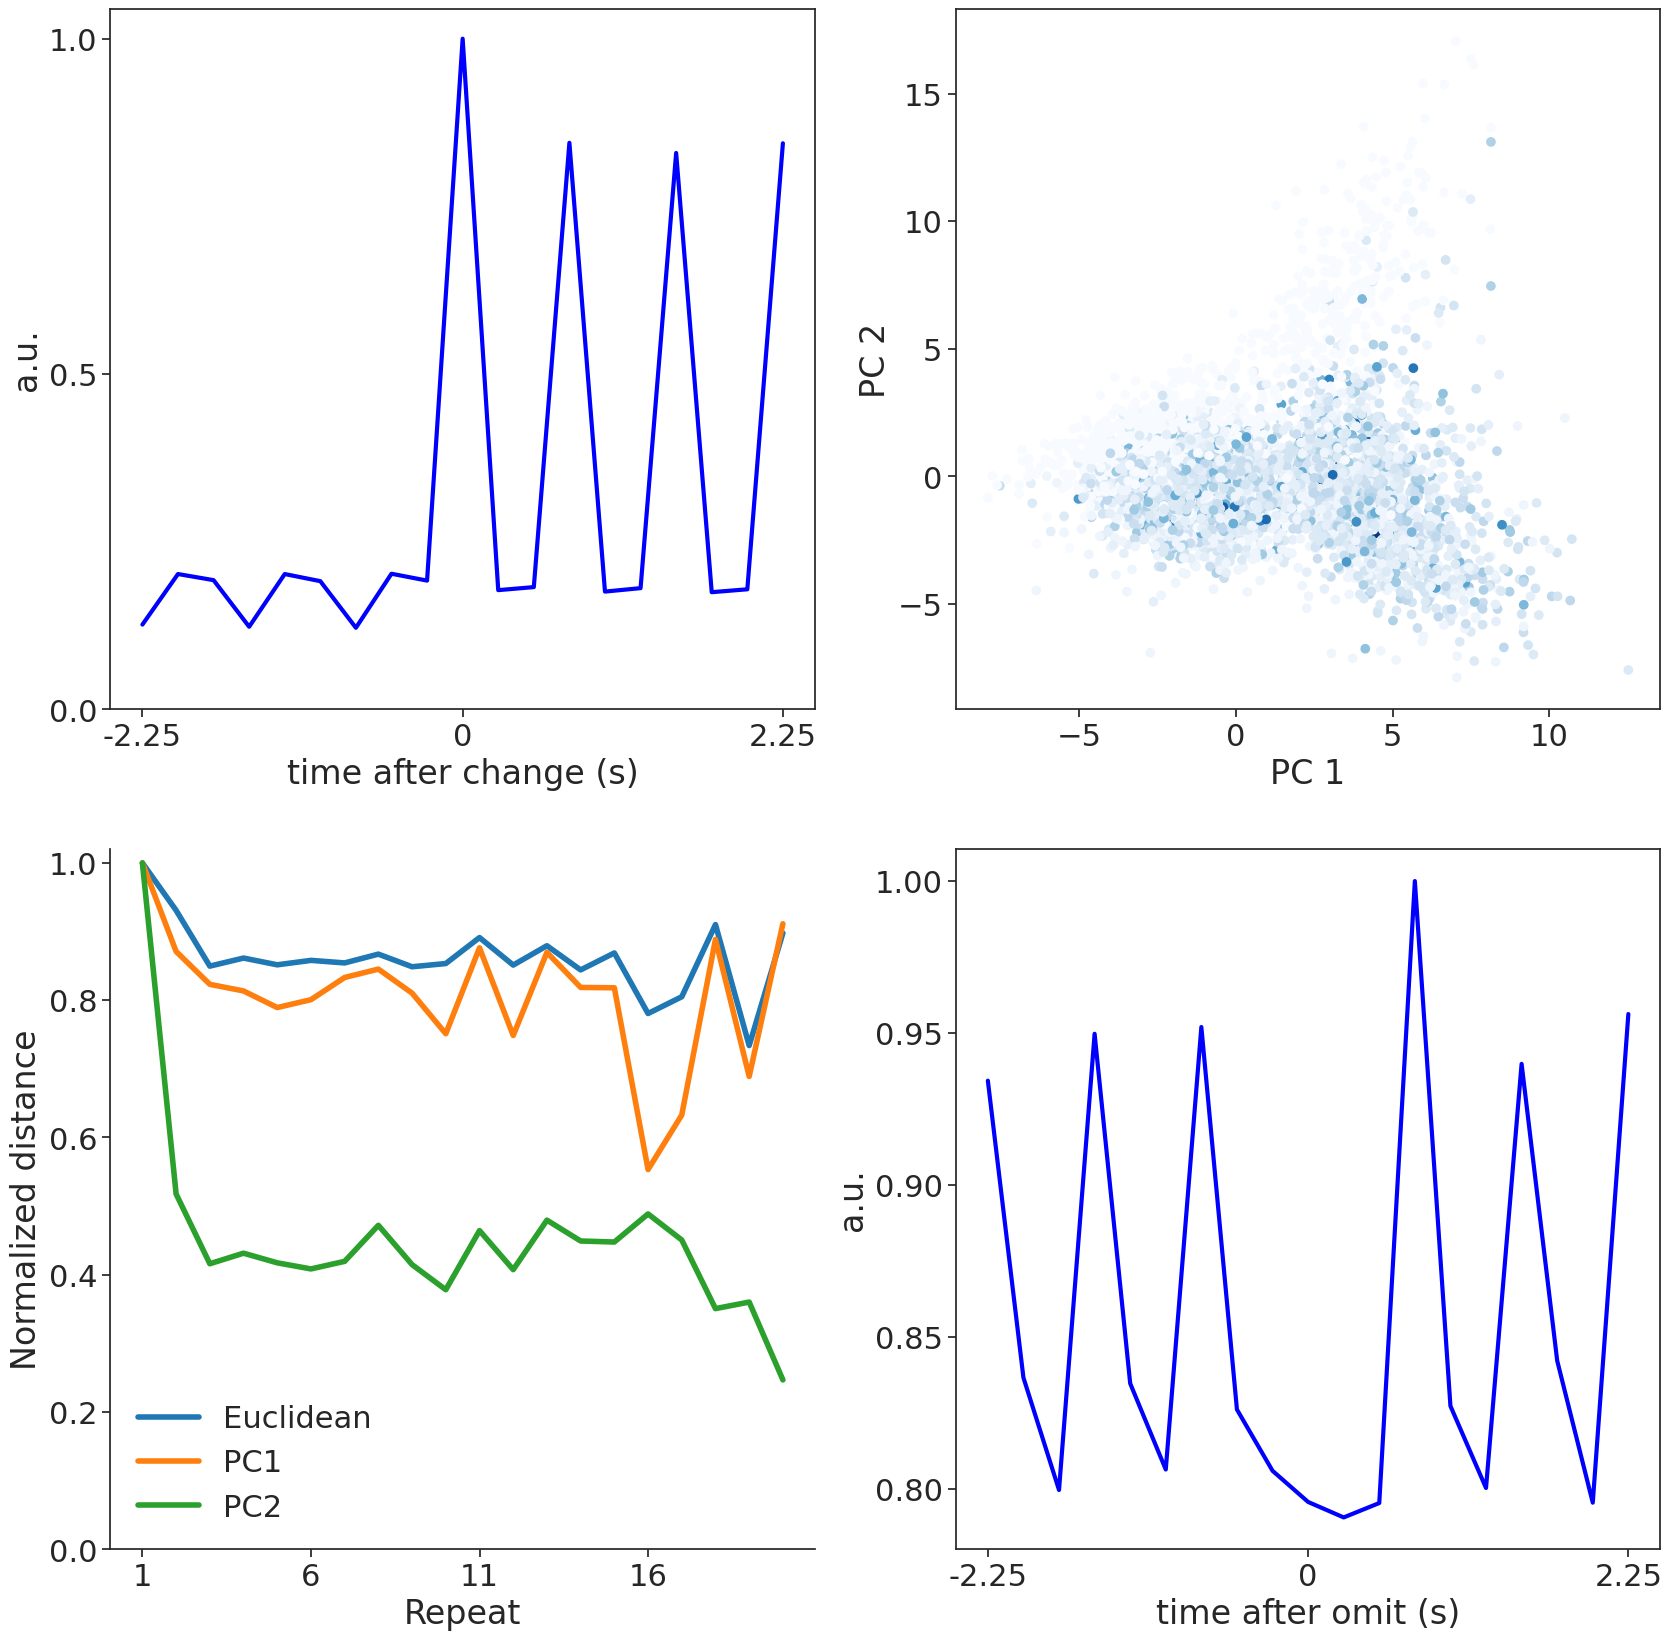

In [18]:
result_path = "RESULT/STPRNN/STPRNN_A_1.pkl"
plot_model_tings(result_path)

## Prediction error RNN, standard objective

$$ h(t) = f(W_i \epsilon + W_h h_{t-1} + b)

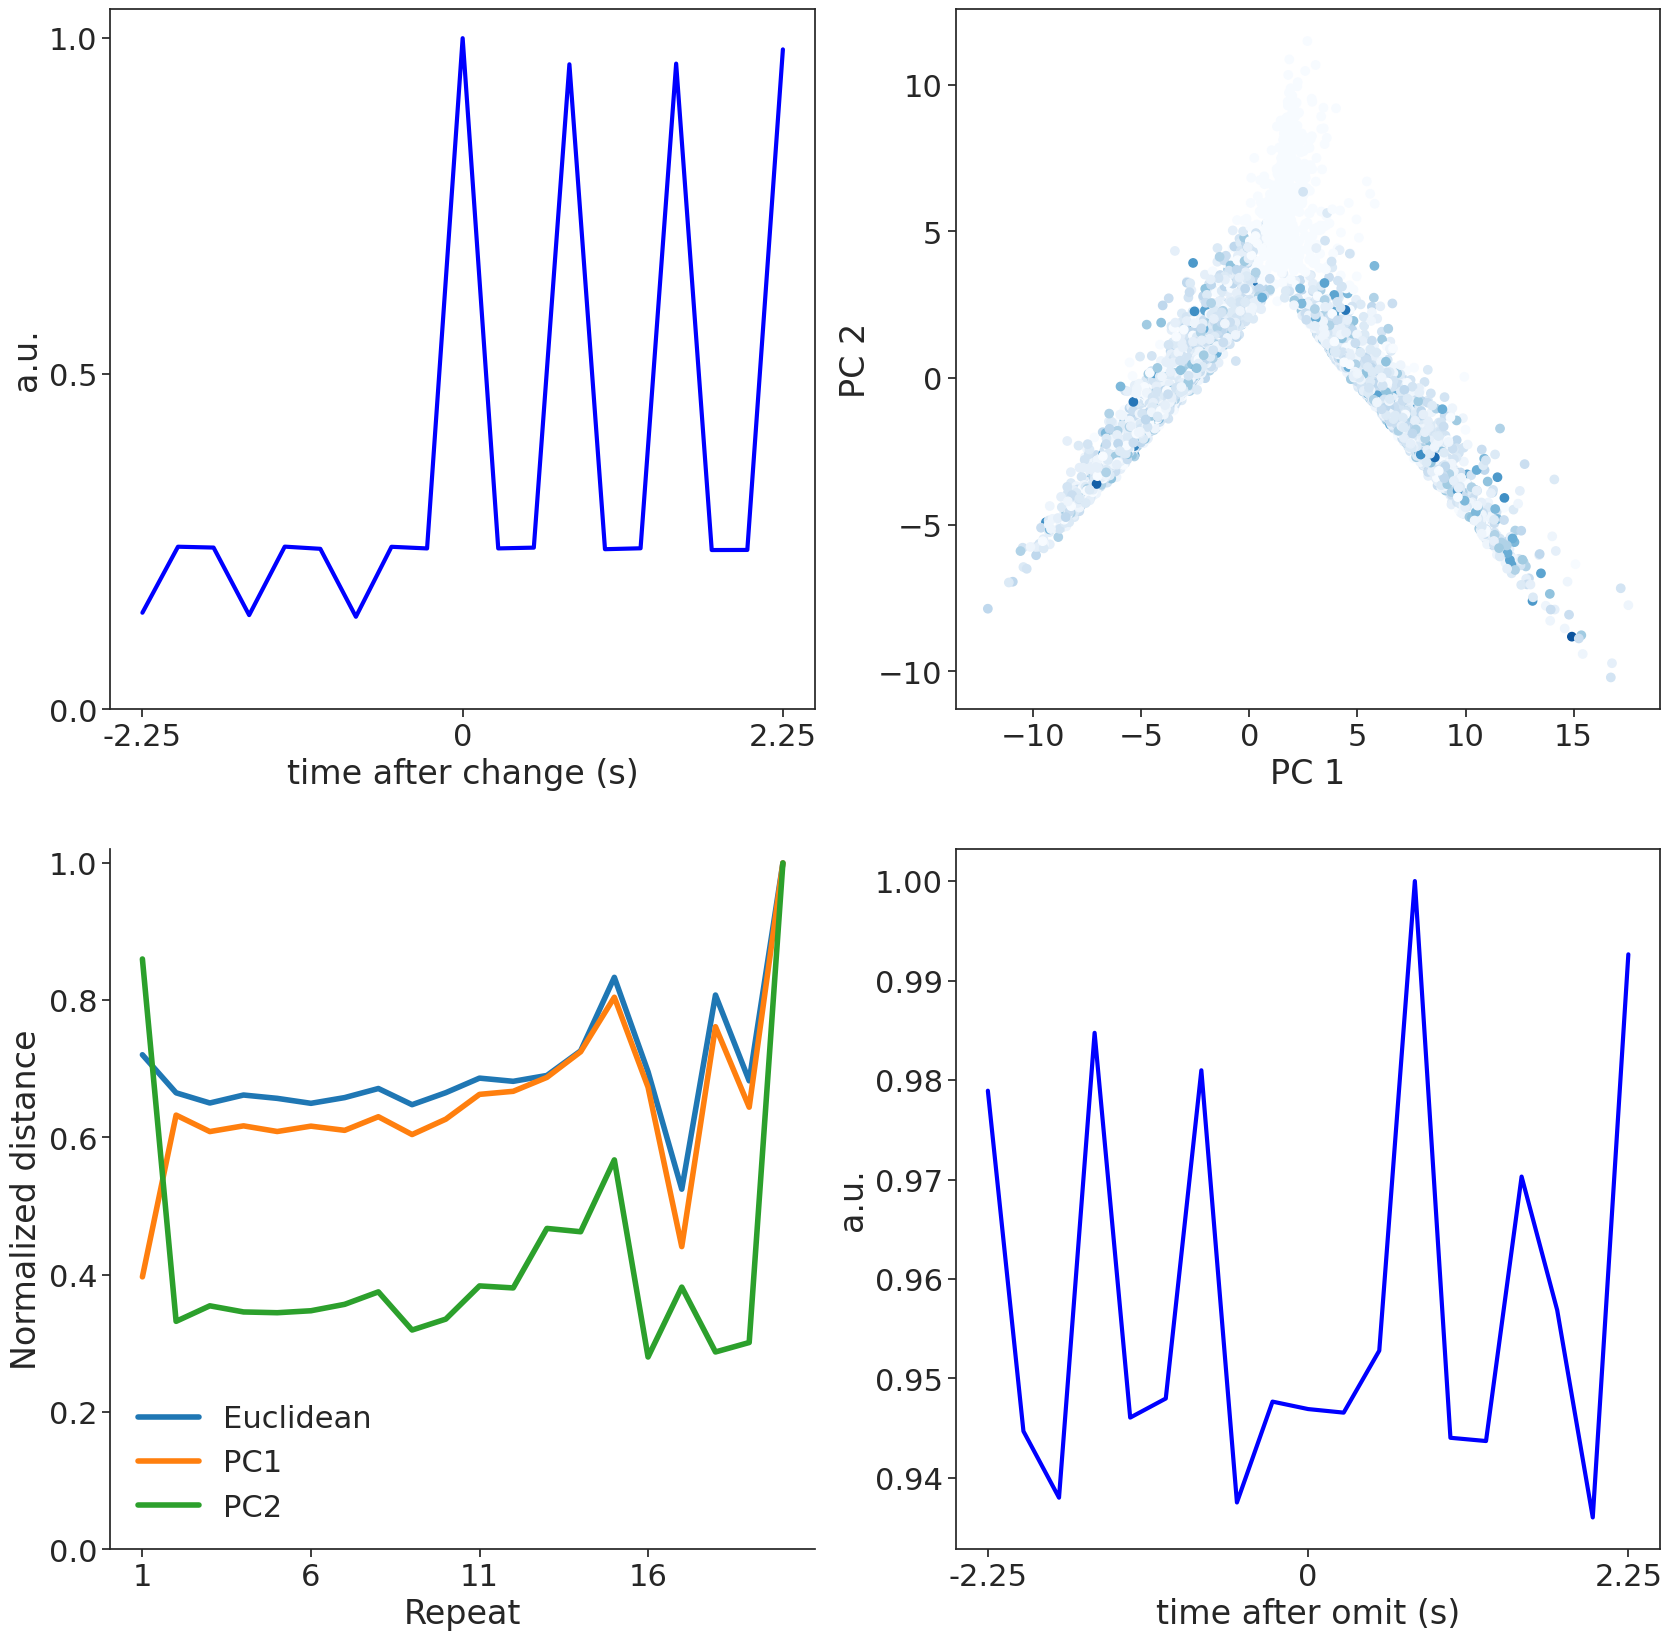

In [3]:
result_path = "RESULT/PERNN2/PERNN2_A_1.pkl"
plot_model_tings(result_path)

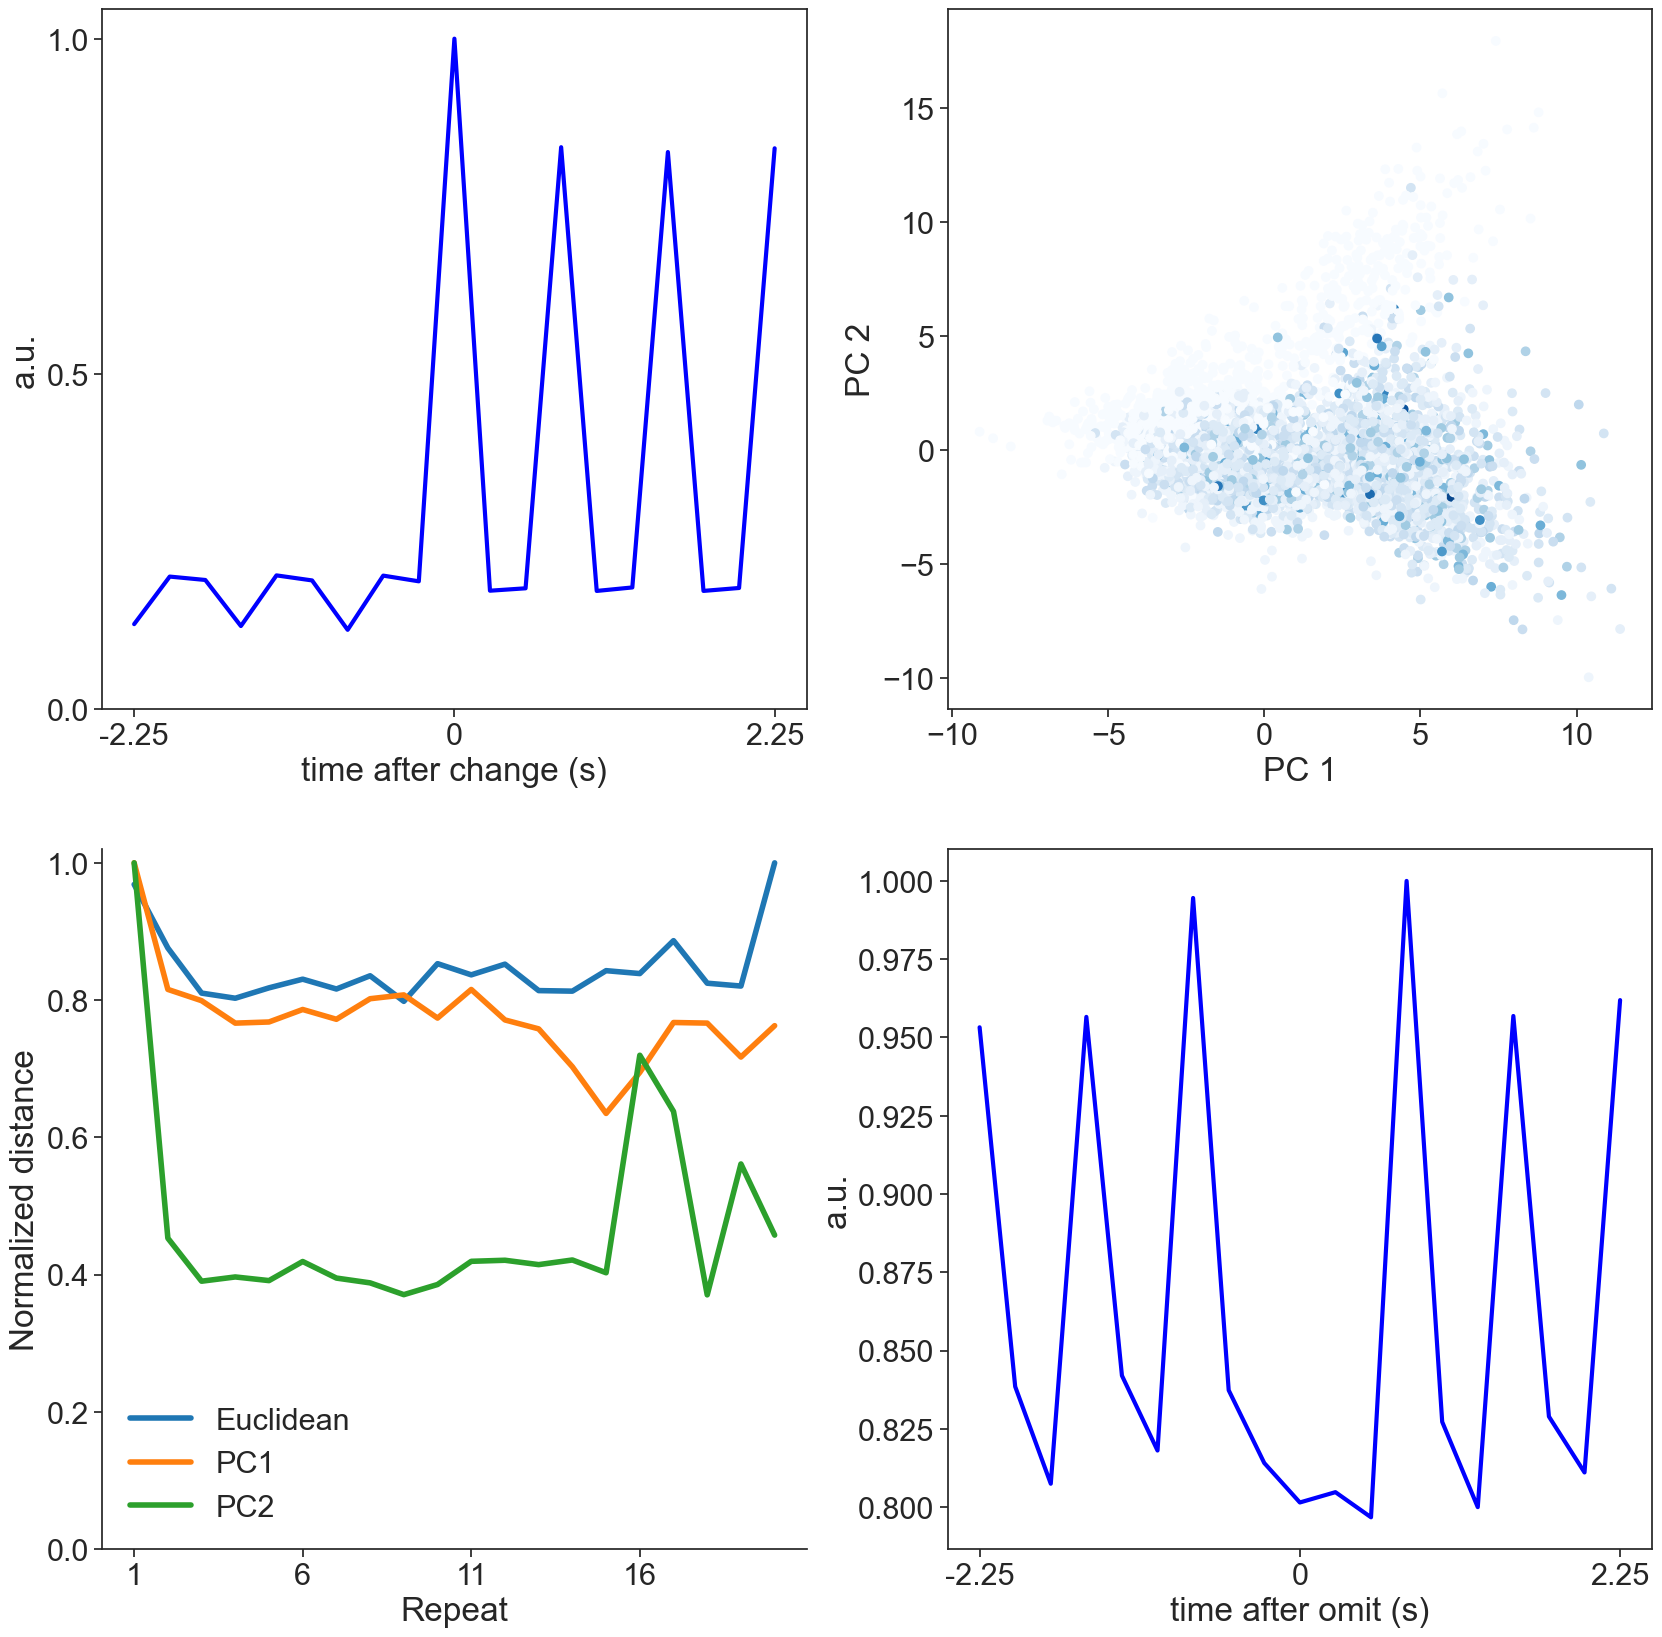

In [6]:
result_path = "RESULT\PERNN\PERNN_A_1.pkl"
plot_model_tings(result_path)

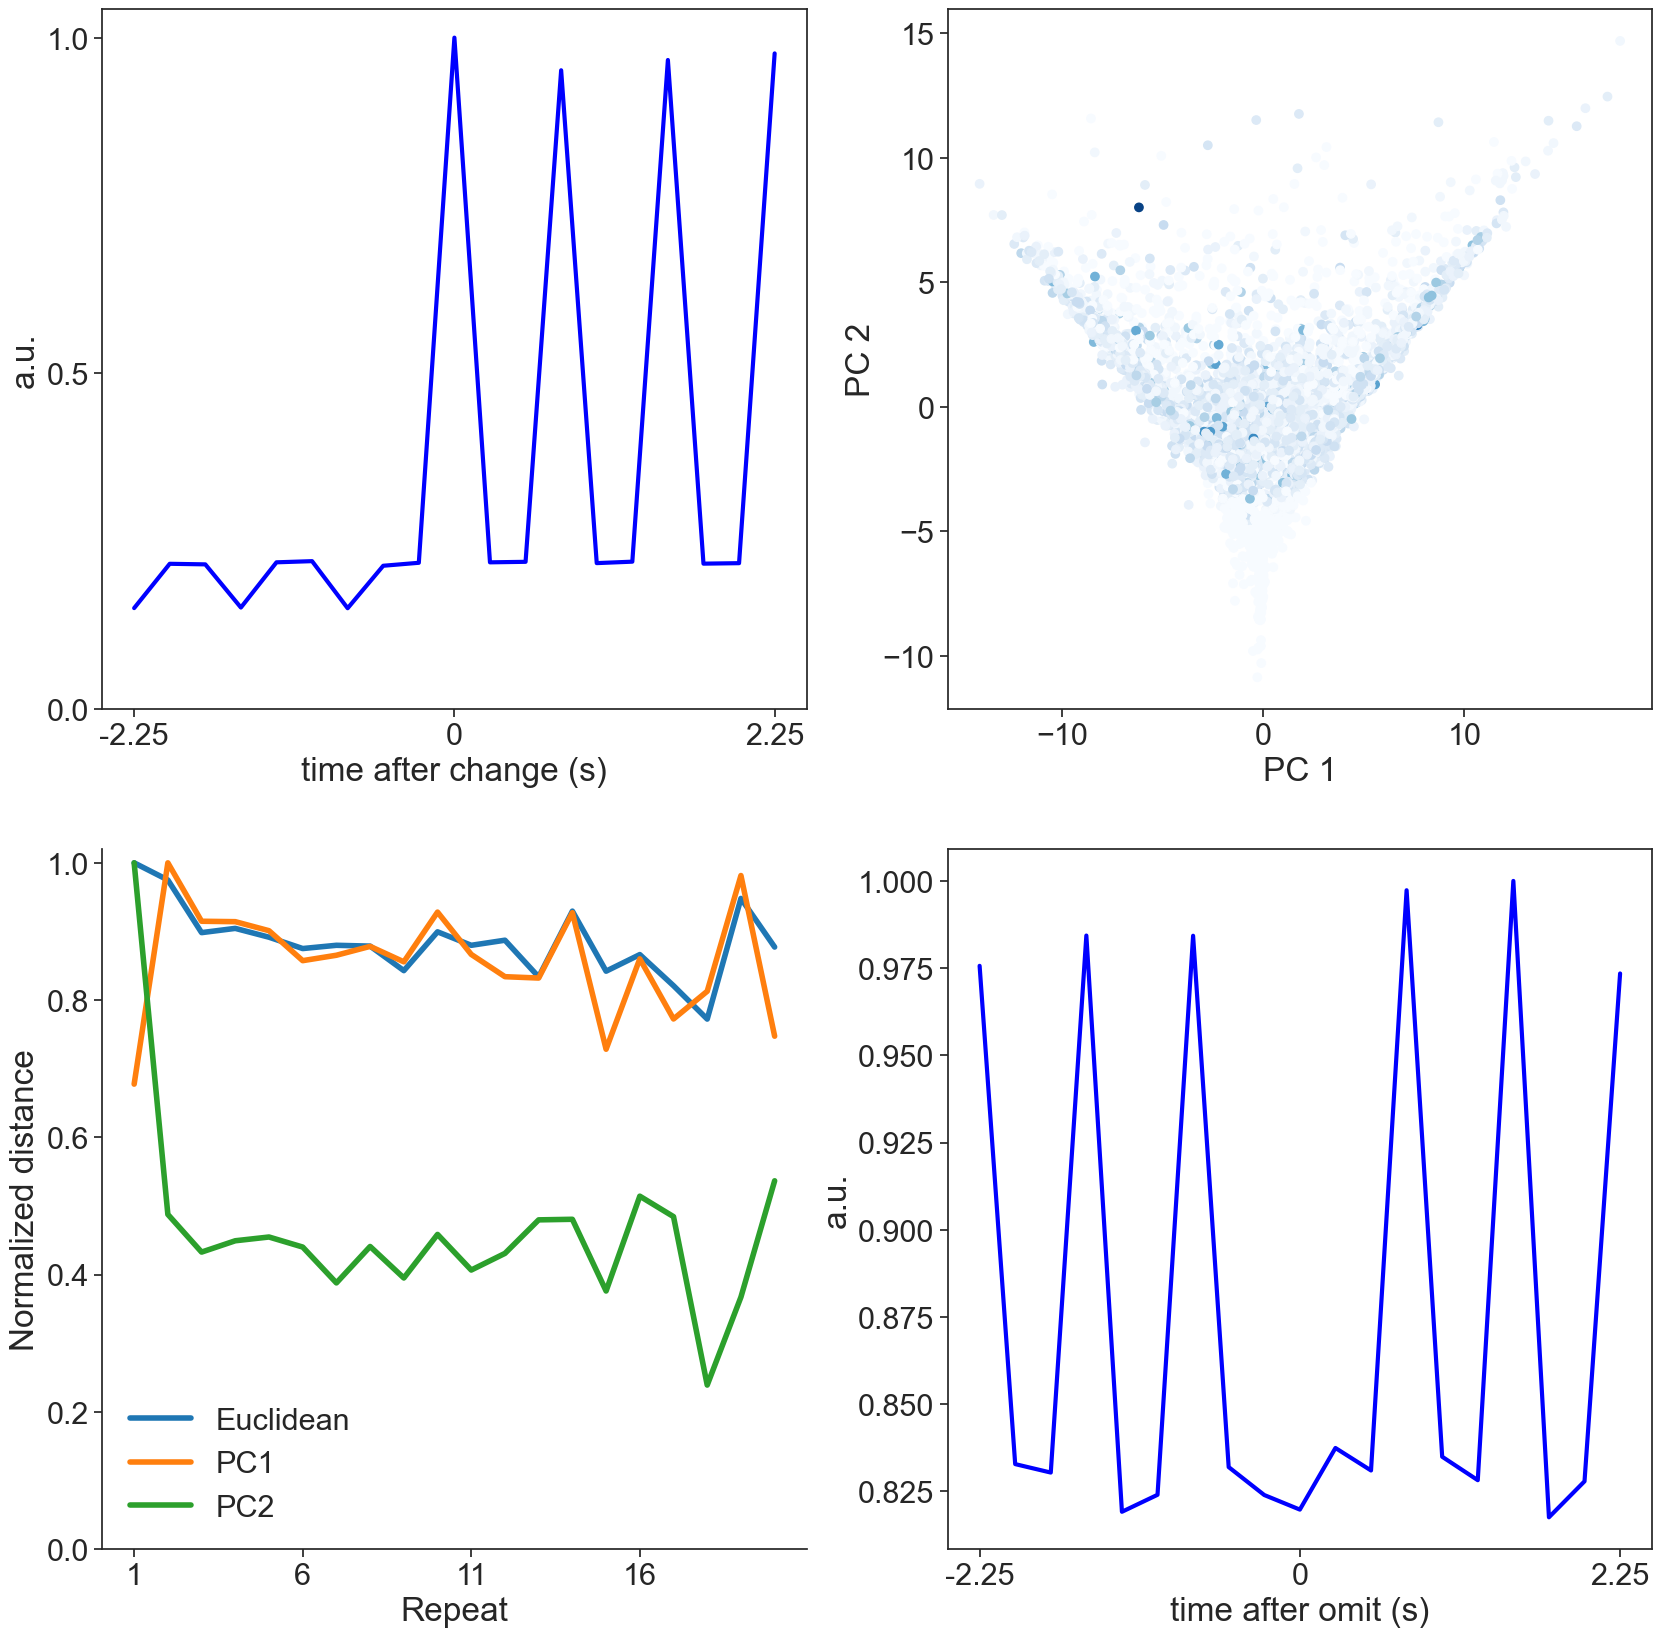

In [9]:
result_path = "RESULT\PERNN\PERNN_A_2.pkl"
plot_model_tings(result_path)

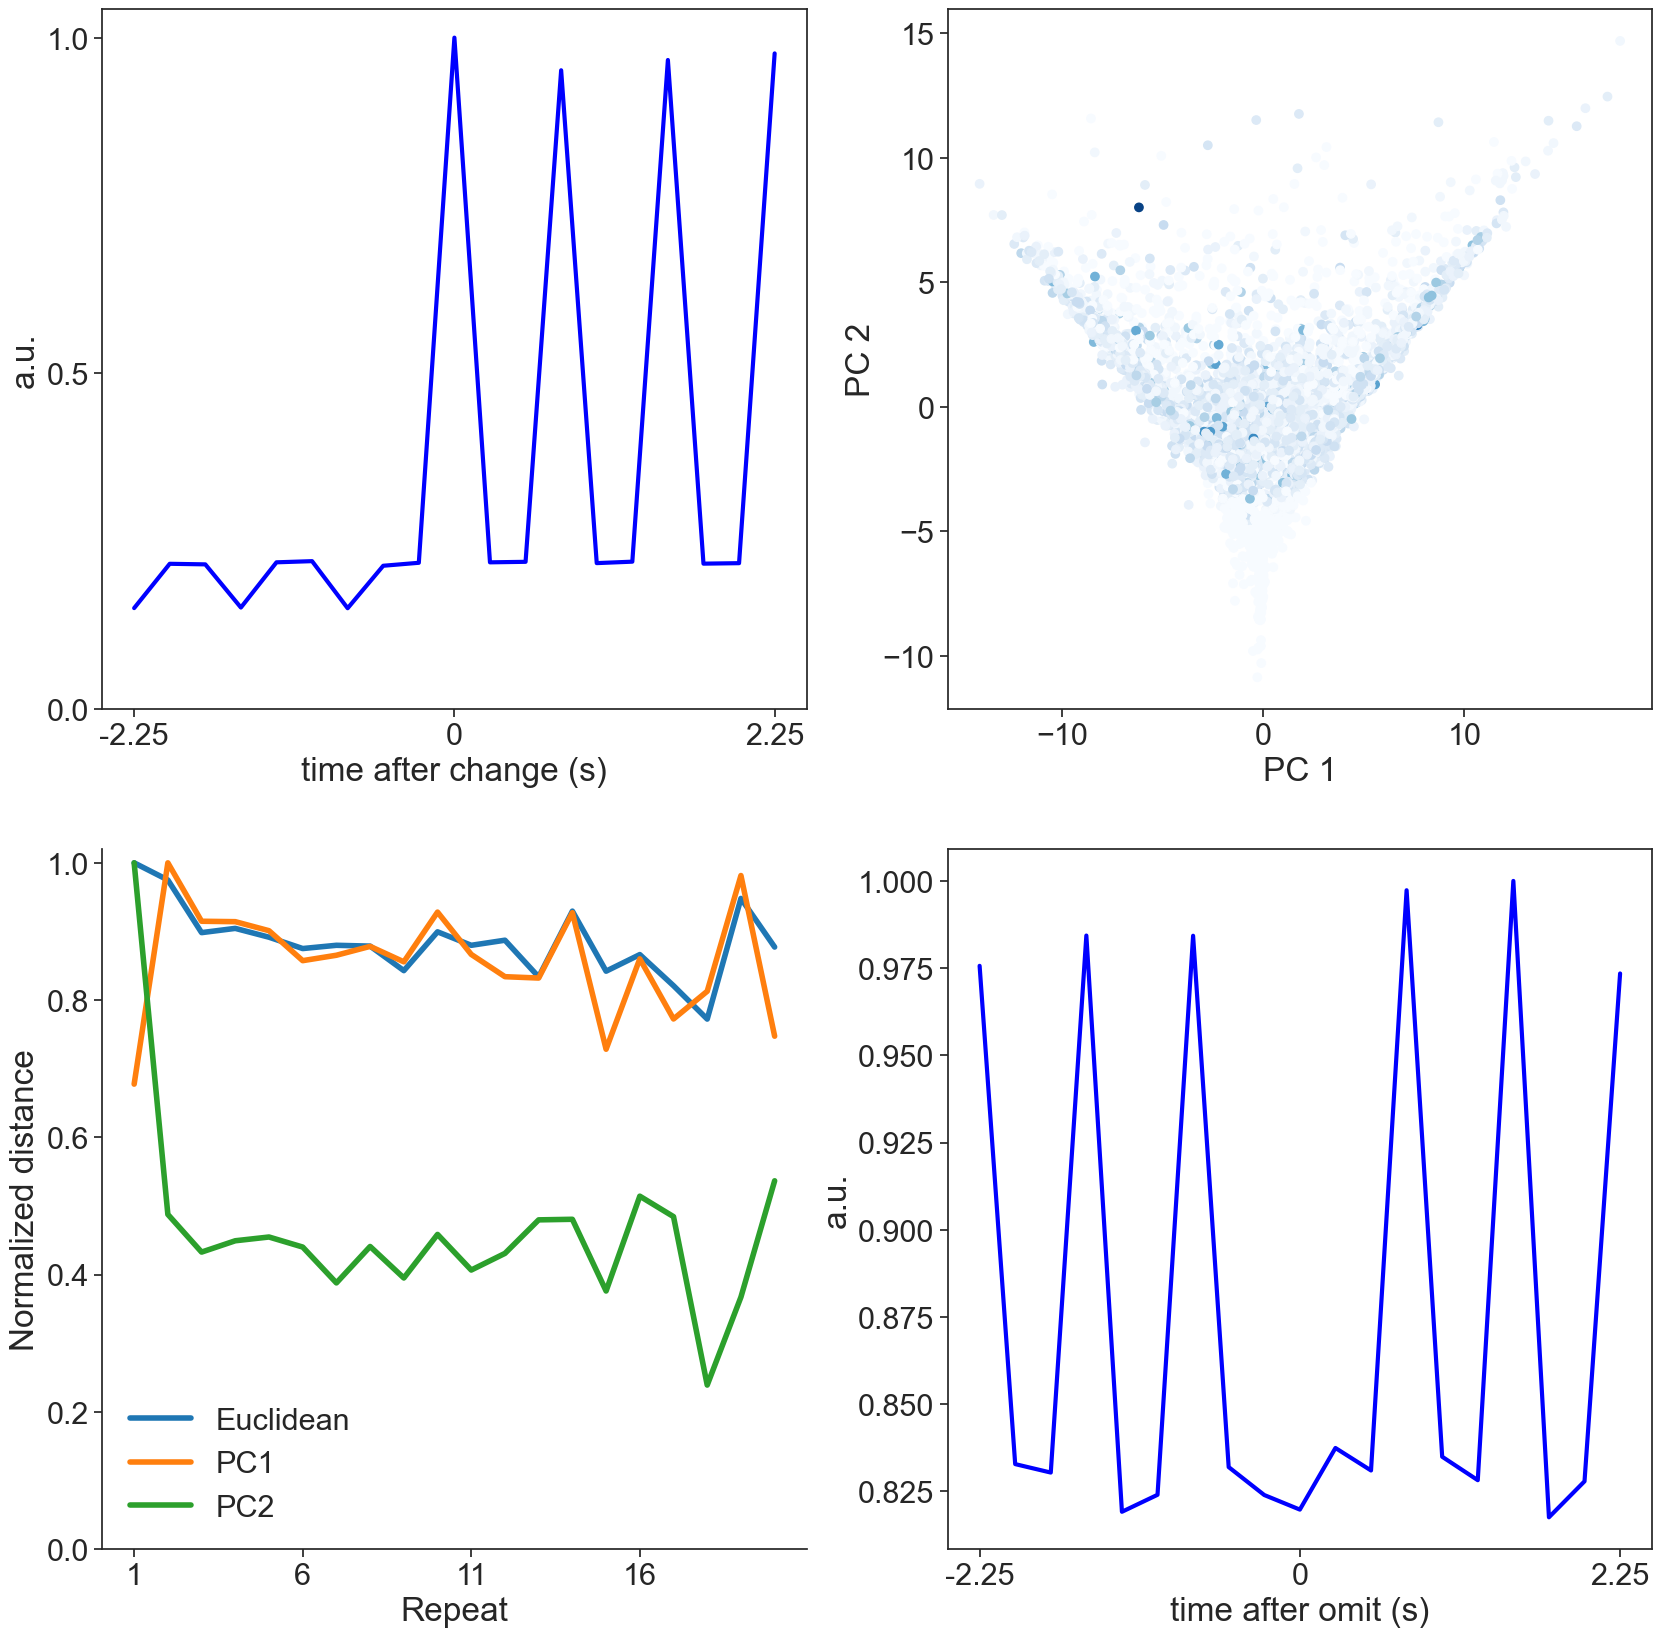

In [12]:
result_path = "RESULT\PERNN\PERNN_A_2_1e-06.pkl"
plot_model_tings(result_path)

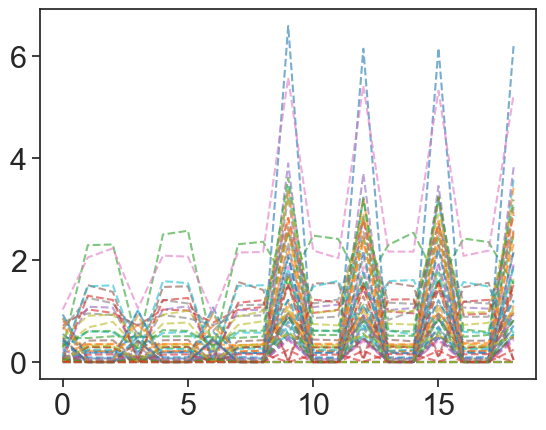

In [13]:
model_data, pref_image = get_acts(result_path)
go_trial = get_go_trials(model_data, pref_image)
plt.plot(go_trial.T, linestyle="--", alpha=0.6);

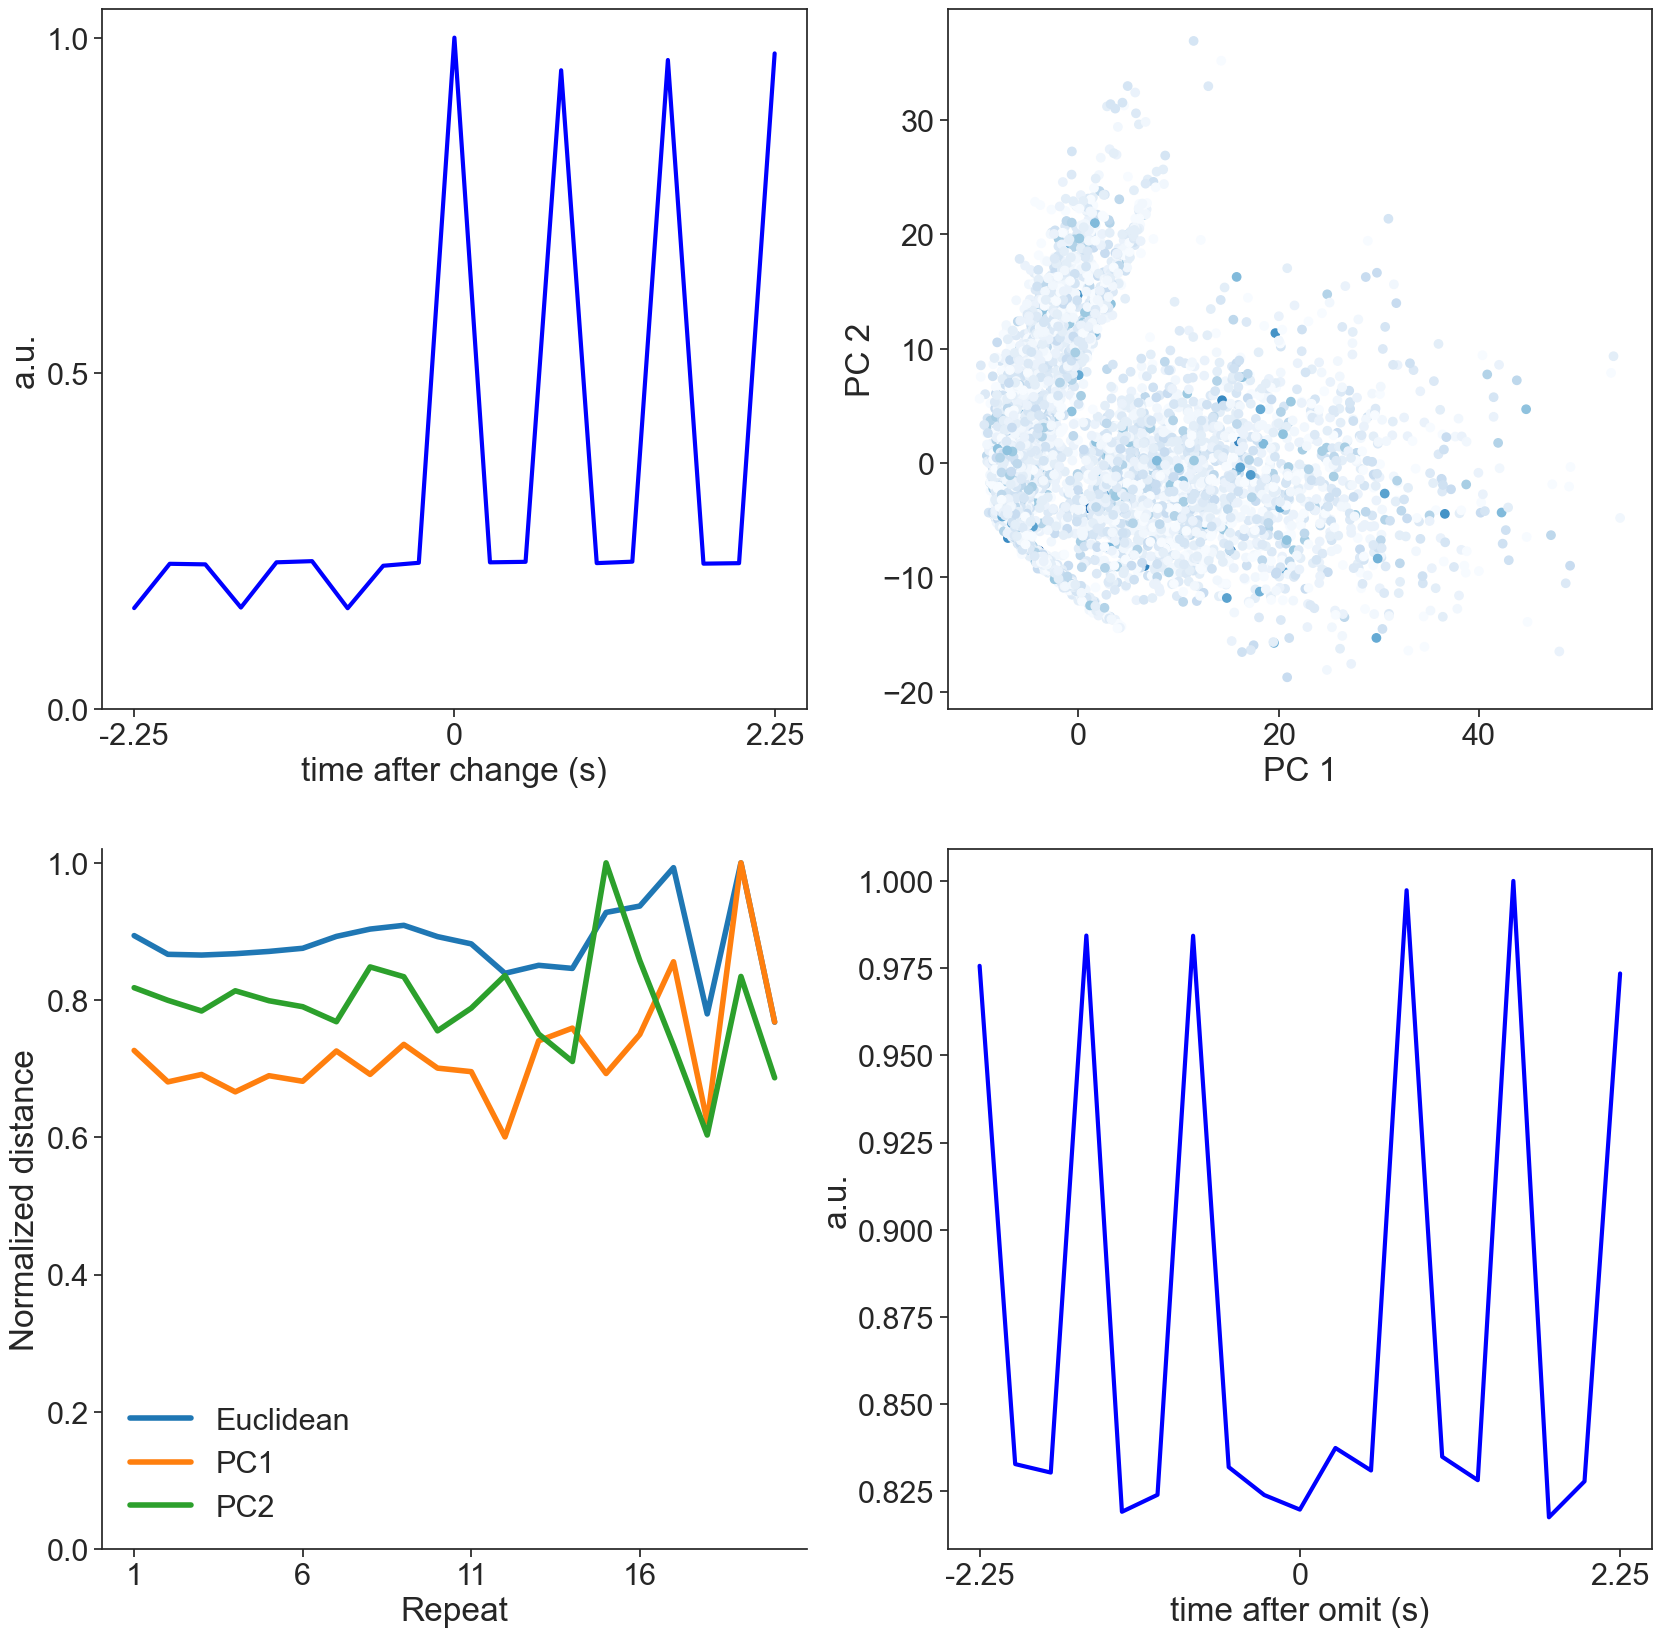

In [21]:
result_path = "RESULT\PERNN\PERNN_A_2_0.0001.pkl"
plot_model_tings(result_path)

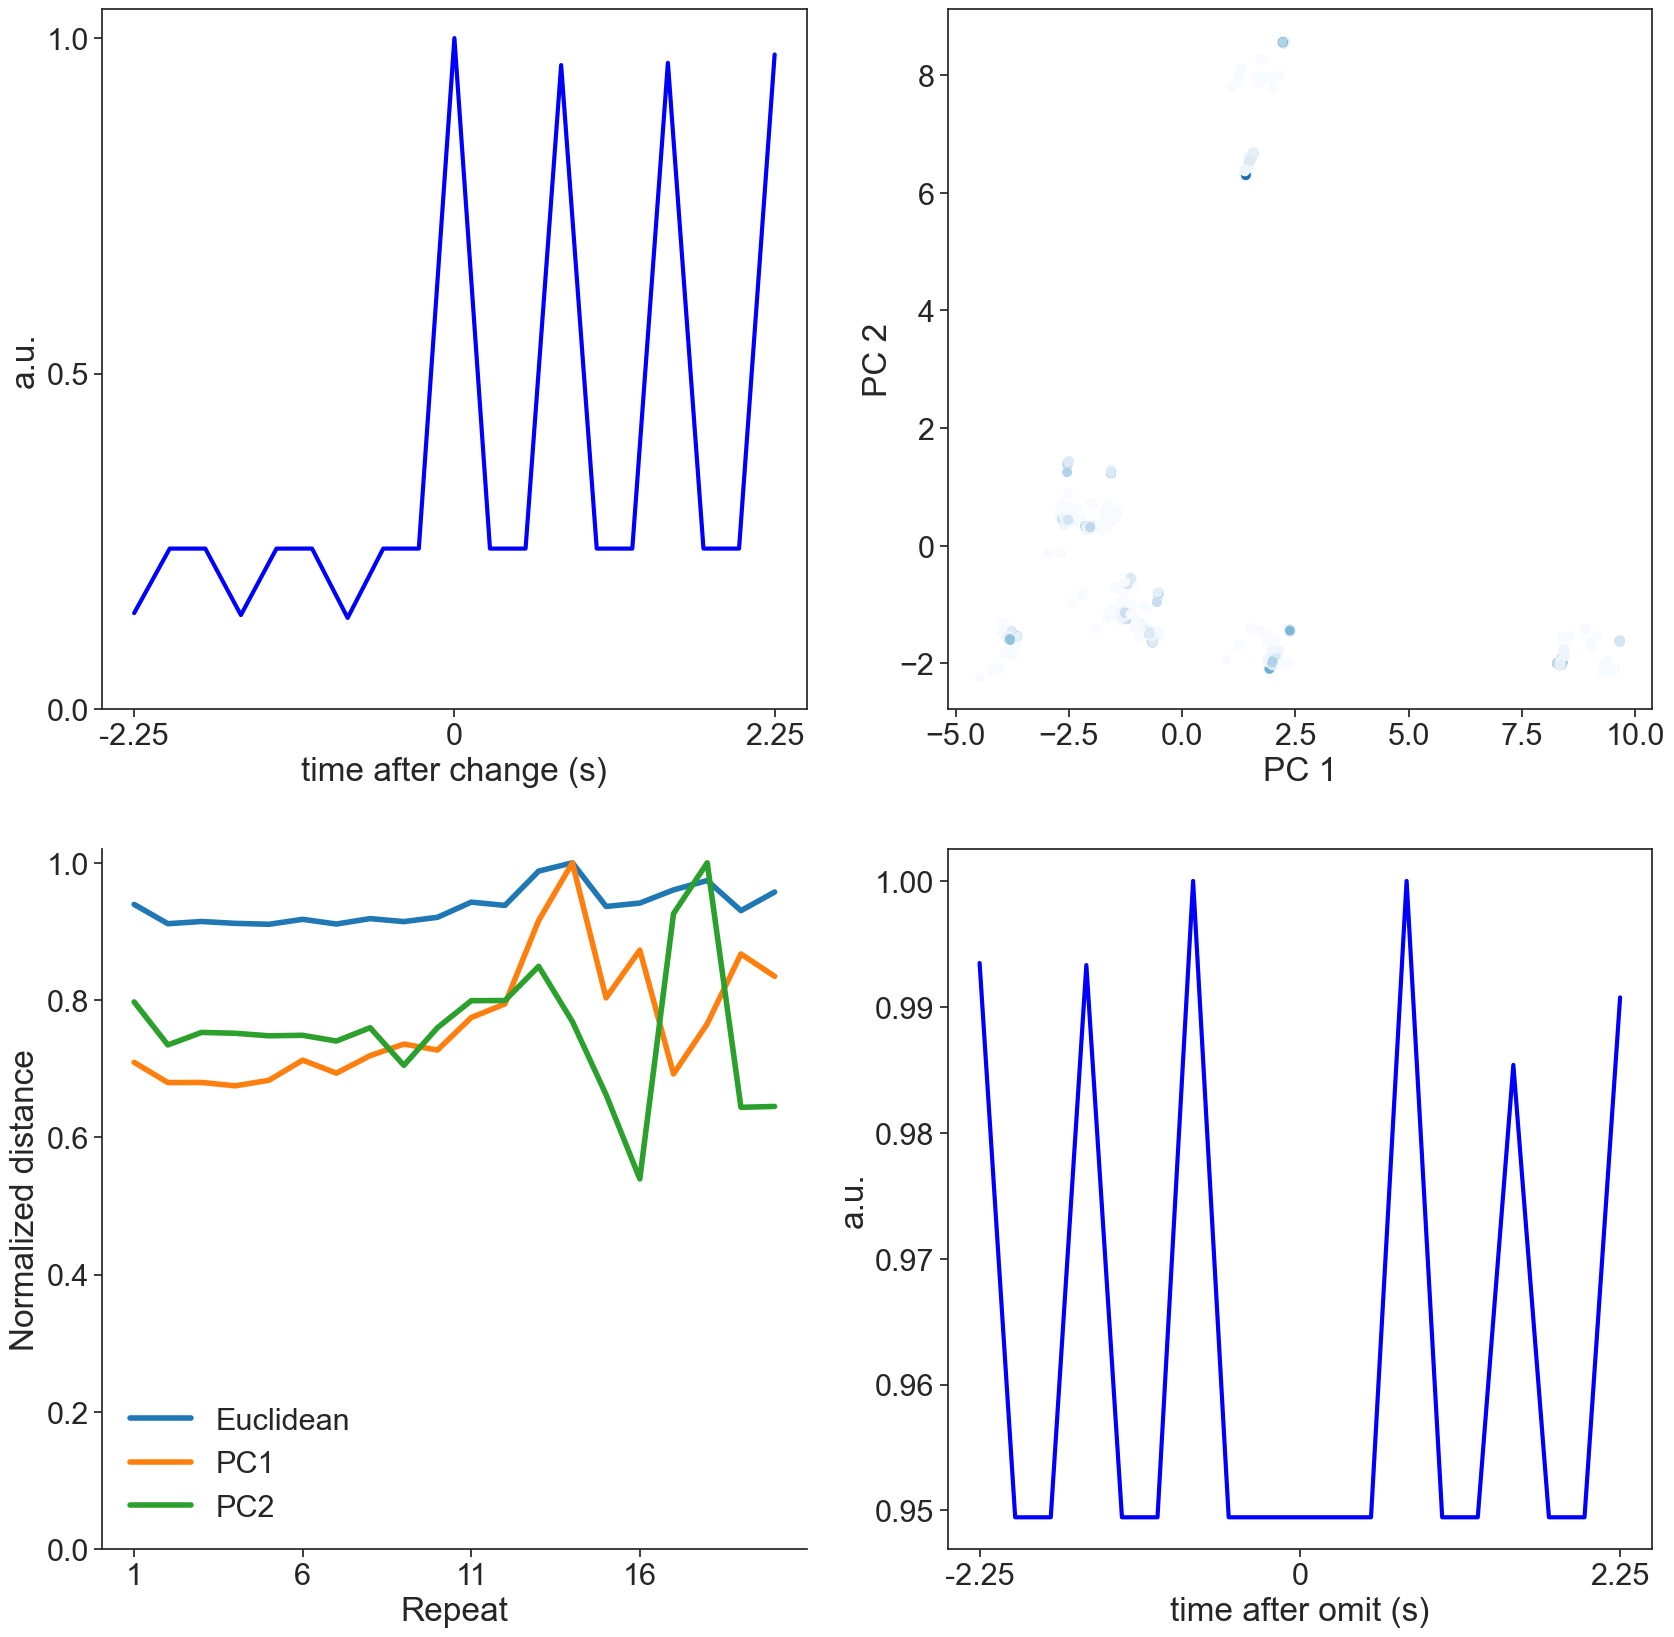

In [2]:
result_path = "RESULT\PERNN\PERNN_A_1_1e-05.pkl"
plot_model_tings(result_path)